<a href="https://colab.research.google.com/github/atkachyshyn123/Thesis/blob/main/Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/YanNeu/spurious_imagenet.git

#Installations

In [ ]:
!rm -r spurious_imagenet

rm: cannot remove 'spurious_imagenet': No such file or directory


In [ ]:
#!/bin/bash

# Download Spurious ImageNet
!cd dataset/spurious_imagenet
!wget https://nc.mlcloud.uni-tuebingen.de/index.php/s/xBtTG9jnACJDxSg/download/images_100_classes.zip
!unzip images_100_classes.zip
!rm images_100_classes.zip
!cd ../..

# Download precomputed alpha values (for SpuFix)
!cd neural_pca
!wget https://nc.mlcloud.uni-tuebingen.de/index.php/s/FqbdADBoem3exgM/download/spurious_alphas_train.zip
!unzip spurious_alphas_train.zip
!rm spurious_alphas_train.zip
!cd ..



/bin/bash: line 1: cd: dataset/spurious_imagenet: No such file or directory
--2025-03-27 07:56:48--  https://nc.mlcloud.uni-tuebingen.de/index.php/s/xBtTG9jnACJDxSg/download/images_100_classes.zip
Resolving nc.mlcloud.uni-tuebingen.de (nc.mlcloud.uni-tuebingen.de)... 134.2.168.2
Connecting to nc.mlcloud.uni-tuebingen.de (nc.mlcloud.uni-tuebingen.de)|134.2.168.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1575557831 (1.5G) [application/zip]
Saving to: ‘images_100_classes.zip’

images_100_classes.   0%[                    ]   4.59M  2.38MB/s               ^C
Archive:  images_100_classes.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of images_100_classes.zip or
        images_100_classes.zip.zip, and canno

#Setup conda

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:07
🔁 Restarting kernel...


In [ ]:
!conda install anaconda-clean
!anaconda-clean --yes

Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - anaconda-clean


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    anaconda-clean-1.1.1       |     pyhd8ed1ab_1           9 KB  conda-forge
    ca-certificates-2025.4.26  |       hbd8a1cb_0         149 KB  conda-forge
    certifi-2025.1.31          |     pyhd8ed1ab_0         159 KB  conda-forge
    conda-24.11.3              |  py311h38be061_0         1.1 MB  conda-forge
    openssl-3.5.0              |       h7b32b05_0         3.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.4 MB

The following NEW packages will be INSTALLED:

  anaconda-clean     conda-forge/noarch::anaconda-clean-1.1.1-pyhd8ed1ab_1 

The following packages will 

In [ ]:
# !cd drive/MyDrive/thesis_data
!conda env create -f /content/drive/MyDrive/thesis_data/reqs.yml


CondaValueError: prefix already exists: /usr/local/envs/spurious_imagenet



In [ ]:
!conda update -n base -c conda-forge conda
!conda init
!conda activate spurious_imagenet

Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.11/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
modified      /root/.bashrc

==> For changes to take effect, close and re-open your current shell. <==


CondaError: Run 'conda init' before 'conda activate'



#Dependencies

In [ ]:
!pip install git+https://github.com/jacobgil/pytorch-grad-cam.git

  Cloning https://github.com/jacobgil/pytorch-grad-cam.git to /tmp/pip-req-build-a8uunapd
  Running command git clone --filter=blob:none --quiet https://github.com/jacobgil/pytorch-grad-cam.git /tmp/pip-req-build-a8uunapd
  Resolved https://github.com/jacobgil/pytorch-grad-cam.git to commit 781dbc0d16ffa95b6d18b96b7b829840a82d93d1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 148.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 195.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/

In [ ]:
!conda install robustness

Channels:
 - conda-forge
Platform: linux-64
Solving environment: / - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



#Load Trained Model

In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive/thesis_data


In [ ]:
import torch
import os

from utils.models.models_32x32.resnet import ResNet18, ResNet34, ResNet50
from utils.models.models_32x32.wideresnet_carmon import WideResNet as WideResNetCarmon
from utils.models.model_factory_32 import build_model as build_model32
from utils.models.model_factory_224 import build_model as build_model224
from torchvision import models
import torch.nn as nn
from torchvision import models as torch_models

from utils.model_normalization import Cifar10Wrapper, Cifar100Wrapper, SVHNWrapper,\
    ImageNetWrapper, RestrictedImageNetWrapper, BigTransferWrapper
from utils.temperature_wrapper import TemperatureWrapper
import utils.models.ebm_wrn as wrn
from utils.models.big_transfer_factory import build_model_big_transfer
from utils.datasets.paths import get_CIFAR10_path, get_imagenet_path


def load_non_native_model(type, folder, device):
    if 'Madry' in type:
        from robustness import model_utils, datasets

        class MadryWrapper(torch.nn.Module):
            def __init__(self, model, normalizer):
                super().__init__()
                self.model = model
                self.normalizer = normalizer

            def forward(self, img):
                normalized_inp = self.normalizer(img)
                output = self.model(normalized_inp, with_latent=False,
                                    fake_relu=False, no_relu=False)
                return output

        if type == 'MadryRestrictedImageNet50':
            dataset = datasets.DATASETS['restricted_imagenet'](get_imagenet_path())
            resume_path = f'RestrictedImageNetModels/MadryModels/ResNet50/{folder}.pt'
        elif type == 'MadryImageNet50':
            dataset = datasets.DATASETS['imagenet'](get_imagenet_path())
            resume_path = f'ImageNetModels/MadryModels/ResNet50/{folder}.pt'
        elif type == 'MadryCifar50':
            dataset = datasets.DATASETS['cifar'](get_CIFAR10_path())
            resume_path = f'Cifar10Models/MadryModels/ResNet50/{folder}.pt'
        else:
            raise NotImplementedError()

        model_kwargs = {
            'arch': 'resnet50',
            'dataset': dataset,
            'resume_path': resume_path,
            'parallel' : False
        }
        model_madry, _ = model_utils.make_and_restore_model(**model_kwargs)

        model = MadryWrapper(model_madry.model, model_madry.normalizer)
        model.to(device)
        model.eval()
    elif type == 'PytorchResNet50':
        model = torch_models.resnet50()
        state_dict_file = f'../utils/ImageNetModels/PytorchModels/ResNet50/{folder}.pt'
        state_dict = torch.load(state_dict_file, map_location=device)
        model.load_state_dict(state_dict)
        model = ImageNetWrapper(model)
        model = model.to(device)
        model.eval()
    elif type == 'TRADESReference':
        model = ResNet50(num_classes=10)
        state_dict_file = f'{folder}.pt'
        state_dict = torch.load(state_dict_file, map_location=device)
        model.load_state_dict(state_dict)
        model.to(device)
        model.eval()
    elif type == 'Carmon':
        model = WideResNetCarmon(num_classes=10, depth=28, widen_factor=10)
        state_dict_file = f'Cifar10Models/{folder}.pt'
        checkpoint = torch.load(state_dict_file, map_location=device)
        state_dict = checkpoint.get('state_dict', checkpoint )
        num_classes = checkpoint.get('num_classes', 10)
        normalize_input = checkpoint.get('normalize_input', False)
        def strip_data_parallel(s):
            if s.startswith('module'):
                return s[len('module.'):]
            else:
                return s
        state_dict = {strip_data_parallel(k): v for k, v in state_dict.items()}
        model.load_state_dict(state_dict)
        model.to(device)
        model.eval()
    else:
        raise ValueError('Type not supported')

    return model


def get_filename(folder, architecture_folder, checkpoint, load_temp):
    if load_temp:
        load_folder_name = f'_temp_{folder}'
    else:
        load_folder_name = f'{folder}'

    if not  checkpoint.isnumeric():
        state_dict_file = f'{architecture_folder}/{load_folder_name}/{checkpoint}.pth'
    else:
        epoch = int(checkpoint)
        state_dict_file = f'{architecture_folder}/{load_folder_name}/checkpoints/{epoch}.pth'
    return state_dict_file


non_native_model = ['PytorchResNet50', 'Madry50', 'TRADESReference', 'MadryRestrictedImageNet50', 'MadryImageNet50', 'Carmon']

def load_cifar_family_model(type, folder, checkpoint, device, dataset_dir, num_classes, load_temp=False, model_params=None):
    model, model_folder_post, _, img_size = build_model32(type, num_classes, model_params=model_params)
    state_dict_file = get_filename(folder, os.path.join(dataset_dir, model_folder_post), checkpoint, load_temp)
    state_dict = torch.load(state_dict_file, map_location=device)
    model.load_state_dict(state_dict)
    return model

def load_big_transfer_model(type, folder, checkpoint, device, dataset_dir, num_classes, load_temp=False, model_params=None):
    model, model_folder_post = build_model_big_transfer(type, num_classes)
    state_dict_file = get_filename(folder, os.path.join(dataset_dir, model_folder_post), checkpoint, load_temp)
    state_dict = torch.load(state_dict_file, map_location=device)
    model.load_state_dict(state_dict)
    return model

def load_imagenet_family_model(type, folder, checkpoint, device, dataset_dir, num_classes, load_temp=False, model_params=None):
    model, model_folder_post, _ = build_model224(type, num_classes, **model_params)
    state_dict_file = get_filename(folder, f'{dataset_dir}/{model_folder_post}', checkpoint, load_temp)
    state_dict = torch.load(state_dict_file, map_location=device)
    model.load_state_dict(state_dict)

    return model

def load_model(type, folder, checkpoint, temperature, device, dataset='cifar10', load_temp=False,  model_params=None):
    dataset = dataset.lower()
    if dataset == 'cifar10':
        dataset_dir = 'Cifar10Models'
        num_classes = 10
        model_family = 'Cifar32'
    elif dataset == 'cifar100':
        dataset_dir = 'Cifar100Models'
        num_classes = 100
        model_family = 'Cifar32'
    elif dataset == 'svhn':
        dataset_dir = 'SVHNModels'
        num_classes = 10
        model_family = 'Cifar32'
    elif dataset == 'tinyImageNet':
        dataset_dir = 'TinyImageNetModels'
        num_classes = 200
        model_family = 'ImageNet224'
    elif dataset == 'restrictedimagenet':
        #dataset_dir = 'RestrictedImageNetModels'
        dataset_dir = 'RestrictedImageNetModels'
        num_classes = 9
        model_family = 'ImageNet224'
    elif dataset == 'imagenet':
        dataset_dir = 'ImageNetModels'
        num_classes = 1000
        model_family = 'ImageNet224'
    elif dataset == 'imagenet100':
        dataset_dir = 'ImageNet100Models'
        num_classes = 100
        model_family = 'ImageNet224'
    elif dataset == 'pets':
        dataset_dir = 'PetsModels'
        num_classes = 37
        model_family = 'ImageNet224'
    elif dataset == 'flowers':
        dataset_dir = 'FlowersModels'
        num_classes = 102
        model_family = 'ImageNet224'
    elif dataset == 'cars':
        dataset_dir = 'CarsModels'
        num_classes = 196
        model_family = 'ImageNet224'
    elif dataset == 'food-101':
        dataset_dir = 'Food-101Models'
        num_classes = 101
        model_family = 'ImageNet224'
    elif dataset == 'lsun_scenes':
        dataset_dir = 'LSUNScenesModels'
        num_classes = 10
        model_family = 'ImageNet224'
    else:
        raise ValueError('Dataset not supported')

    if type in non_native_model:
        model = load_non_native_model(type, folder, device)
        if temperature is not None:
            model = TemperatureWrapper(model, temperature)
        return model
    if 'BiT' in type:
        model = load_big_transfer_model(type, folder, checkpoint, device, dataset_dir, num_classes, load_temp=load_temp)
        model = BigTransferWrapper(model)
    else:
        if model_family == 'Cifar32':
            model = load_cifar_family_model(type, folder, checkpoint, device, dataset_dir, num_classes,
                                            load_temp=load_temp, model_params=model_params)
        elif model_family == 'ImageNet224':
            model = load_imagenet_family_model(type, folder, checkpoint, device, dataset_dir, num_classes,
                                               load_temp=load_temp, model_params=model_params)
        else:
            raise ValueError()

        if dataset == 'cifar10':
            model = Cifar10Wrapper(model)
        elif dataset == 'cifar100':
            model = Cifar100Wrapper(model)
        elif dataset == 'svhn':
            model = SVHNWrapper(model)
        elif dataset == 'tinyimagenet':
            model = Cifar100Wrapper(model)
        elif dataset == 'imagenet':
            model = ImageNetWrapper(model)
        elif dataset == 'restrictedimagenet':
            model = RestrictedImageNetWrapper(model)
        elif dataset == 'imagenet100':
            model = ImageNetWrapper(model)
        elif dataset == 'pets':
            model = ImageNetWrapper(model)
        elif dataset == 'food-101':
            model = ImageNetWrapper(model)
        elif dataset == 'cars':
            model = ImageNetWrapper(model)
        elif dataset == 'flowers':
            model = ImageNetWrapper(model)
        elif dataset == 'lsun_scenes':
            model = ImageNetWrapper(model)
        else:
            raise ValueError('Dataset not supported')

    model.to(device)

    if temperature is not None:
       model = TemperatureWrapper(model, temperature)

    model.eval()
    return model

/usr/local/lib/python3.11/dist-packages/timm/models/factory.py:4: FutureWarning: Importing from timm.models.factory is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)


In [ ]:
import torch
import numpy as np


def euclidean_dist(x, y):
    m, n = x.size(0), y.size(0)
    xx = torch.pow(x, 2).sum(1, keepdim=True).expand(m, n)
    yy = torch.pow(y, 2).sum(1, keepdim=True).expand(n, m).t()
    dist = xx + yy

    dist.addmm_(1, -2, x, y.t())
    dist = dist.clamp(min=1e-12).sqrt()
    return dist


def euclidean_dist_pair(x):
    m = x.size(0)
    xx = torch.pow(x, 2).sum(1, keepdim=True).expand(m, m)
    dist = xx + xx.t()
    dist.addmm_(1, -2, x, x.t())
    dist = dist.clamp(min=1e-12).sqrt()
    return dist

def euclidean_dist_np(x, y):
    (rowx, colx) = x.shape
    (rowy, coly) = y.shape
    xy = np.dot(x, y.T)
    x2 = np.repeat(np.reshape(np.sum(np.multiply(x, x), axis=1), (rowx, 1)), repeats=rowy, axis=1)
    y2 = np.repeat(np.reshape(np.sum(np.multiply(y, y), axis=1), (rowy, 1)), repeats=rowx, axis=1).T
    return np.sqrt(np.clip(x2 + y2 - 2. * xy, 1e-12, None))

def euclidean_dist_pair_np(x):
    (rowx, colx) = x.shape
    xy = np.dot(x, x.T)
    x2 = np.repeat(np.reshape(np.sum(np.multiply(x, x), axis=1), (rowx, 1)), repeats=rowx, axis=1)
    return np.sqrt(np.clip(x2 + x2.T - 2. * xy, 1e-12, None))

#Activation Space

In [ ]:
!conda install captum

Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



In [ ]:
import captum
from captum.attr._utils.baselines import ProductBaselines
import torch
import numpy as np
from captum import attr as cattr
import bisect
import random
import tensorflow as tf

from neural_pca.counterfactual import generate_feature_counterfactuals
from neural_pca.data import imagenet_label2class
from neural_pca.pca import compute_pca

print("it works")
class  ActivationSpace():

    def __init__(self, model, last_layer, target_idx, device, train_loader=None, metric="euclidean"):
        self.target = target_idx
        self.target_name = imagenet_label2class[self.target]
        print(self.target_name)
        self.device=device
        self.model = model.to(self.device)

        self._last_layer = last_layer
        self._layer_activations = cattr.LayerActivation(model, last_layer)
        self._train_loader = train_loader
        self._last_weights = last_layer.weight.data[self.target].squeeze()
        if metric == "euclidean":
            self.metric = euclidean_dist

    def fit(self, eigvec_scale=True, only_act=False):
        if self._train_loader is None:
            raise Exception('Missing train_loader. Use AcitvationSpace.load() or init with train_loader.')

        # get activations
        print('Computing activations\n')
        self.activations_train = self._compute_training_activations(only_act)
        # print("activation train", self.activations_train)

        # compute pca
        print('Computing principal components\n')
        if only_act:
            self.eigenvectors = None
            self.pca_mean = torch.mean(self.activations_train)
            self.pca_train = None
        else:
            _, self.eigenvectors, pca_mean = compute_pca(self.activations_train.T.cpu().numpy())
            self.eigenvectors = torch.tensor(self.eigenvectors, dtype=torch.float32, device=self.device)
            self.pca_mean = torch.tensor(pca_mean, device=self.device)

            # transform training points
            self.pca_train = self._pca_transform(self.activations_train, eigvec_scale=eigvec_scale)

    def transform(self, images, eigvec_scale=True):
        act = self._compute_activations(images)
        return self._pca_transform(act, eigvec_scale=eigvec_scale)

    def compute_feature_vce(self, pca_dims, background_color=[0.5,0.5,0.5], norm='L2', eps=30, steps=200, rnd_seed=0, loss='obj', reg_other=1.0, eigvec_scale=True, return_losses=False, minimize=False, minimize_abs=False, input_size=(3,224,224)):
        assert len(background_color) == 3
        assert background_color[0] <= 1 and background_color[0] >= 0
        assert background_color[1] <= 1 and background_color[1] >= 0
        assert background_color[2] <= 1 and background_color[2] >= 0

        n_targets = len(pca_dims)

        # create backgrounds
        backgrounds = torch.zeros((n_targets, input_size[0], input_size[1], input_size[2]), device=self.device)
        backgrounds += torch.tensor(background_color, device=self.device)[:, None, None]

        # generate counterfactuals
        print('Computing feature counterfactuals\n')
        perturbation_targets = torch.tensor(pca_dims, dtype=torch.long)
        if return_losses:
            cfs, losses = generate_feature_counterfactuals(
                model=self.model,
                images=backgrounds,
                last_layer=self._last_layer,
                eigenvectors=self.eigenvectors,
                target_cls=self.target,
                norm=norm,
                eps=eps,
                steps=steps,
                perturbation_targets=perturbation_targets,
                device=self.device,
                seed=rnd_seed,
                loss=loss,
                reg_other=reg_other,
                return_losses=True,
                minimize=minimize,
                minimize_abs=minimize_abs,
            )
        else:
            cfs = generate_feature_counterfactuals(
                model=self.model,
                images=backgrounds,
                last_layer=self._last_layer,
                eigenvectors=self.eigenvectors,
                target_cls=self.target,
                norm=norm,
                eps=eps,
                steps=steps,
                perturbation_targets=perturbation_targets,
                device=self.device,
                seed=rnd_seed,
                loss=loss,
                reg_other=reg_other,
                minimize=minimize,
                minimize_abs=minimize_abs
            )

        with torch.no_grad():
            out = self.model(cfs)
            prob = torch.softmax(out, dim=1).cpu().detach()
            pred = torch.max(out, dim=1)[1].cpu().detach()

            act = self._compute_activations(cfs)
            pca_cfs = self._pca_transform(act, eigvec_scale)

        ret = (cfs.cpu().detach(), pca_cfs, prob, pred)
        if return_losses:
            ret = (*ret, losses)
        return ret

    def top_features(self, k=10, order='eigenvalues', background_color=[0.5, 0.5, 0.5], eps=30, steps=200, rnd_seed=0, pc_batch_size=128, loss='obj', reg_other=1.0, eigvec_scale=True):
        assert order in ['eigenvalues', 'confidence', 'eigenvector-l1', 'max-logit-contribution']
        if order == 'eigenvalues':
            pca_dims = list(range(k))
        elif order == 'confidence':
            pca_dims = list(range(pc_batch_size))
        elif order == 'eigenvector-l1':
            idcs_sorted = np.argsort(np.sum(self.eigenvectors, axis=0))
            pca_dims = np.flip(idcs_sorted[-k:]).copy()
        elif order == 'max-logit-contribution':
            max_contributions = np.max(self.pca_train, axis=0)
            idcs_sorted = np.argsort(max_contributions)
            pca_dims = np.flip(idcs_sorted[-k:]).copy()

        cfs, pca_cfs, prob, pred = self.compute_feature_vce(
                pca_dims=pca_dims,
                background_color=background_color,
                eps=eps,
                steps=steps,
                rnd_seed=rnd_seed,
                loss=loss,
                reg_other=reg_other,
                eigvec_scale=eigvec_scale)
        pca_dims = np.array(pca_dims)
        if order in ['eigenvalues', 'eigenvector-l1', 'max-logit-contribution']:
            return cfs, pca_cfs, prob, pred, pca_dims
        elif order == 'confidence':
            sorted_idcs = torch.argsort(prob[:, self.target], descending=True)
            return cfs[sorted_idcs][:k], pca_cfs[sorted_idcs][:k], prob[sorted_idcs][:k], pred[sorted_idcs][:k], pca_dims[sorted_idcs][:k]

    def knn(self, x, k=5, return_indices=False):
        diffs = np.linalg.norm(self.pca_train - x, axis=1)
        knn_idcs = np.argsort(diffs)[:k]
        neighbours = []
        for idx in knn_idcs:
            neighbours.append(self._train_loader.dataset[idx][0])
        if return_indices:
            return neighbours, knn_idcs
        return neighbours

    def max_cov(self, alpha_train, act_train, act_mean):
        # centered weighted training activations
        centered_act = act_train - act_mean

        alpha_act = torch.sum(alpha_train[:, None] * centered_act, dim=0)
        cov = torch.linalg.norm(alpha_act, ord=2)
        max_cov_direction = alpha_act/cov

        return max_cov_direction, cov

    def _filter_similar_images(self, image_indices, similarity_threshold=0.85):

        if len(image_indices) <= 1:
            return image_indices

        # Get PCA representations for all candidate images
        representations = self.pca_train[image_indices]

        filtered_indices = [image_indices[0]]  # Always keep the first image

        # For each remaining image, check if it's too similar to any already selected image
        for i in range(1, len(image_indices)):
            is_duplicate = False
            curr_rep = representations[i].unsqueeze(0)  # Current image representation

            # Compare with all already selected images
            for j in filtered_indices:
                j_idx = image_indices.tolist().index(j)
                selected_rep = representations[j_idx].unsqueeze(0)

                # Compute cosine similarity
                similarity = torch.nn.functional.cosine_similarity(curr_rep, selected_rep)

                if similarity > similarity_threshold:
                    is_duplicate = True
                    break

            if not is_duplicate:
                filtered_indices.append(image_indices[i])

        return filtered_indices


    def _maximizing_train_points_alpha_no_duplicates(self, pca_dim, k=5, similarity_threshold=0.85, return_indices=False):
        # Get PCA representations
        representation = self.pca_train

        # Sort by activation value on the target PCA dimension
        sorted_idcs = torch.argsort(representation[:, pca_dim], descending=True)

        # Get more candidates than needed (3x) to allow for filtering
        candidate_idcs = sorted_idcs[:k*3]

        # Filter out similar images
        filtered_idcs = self._filter_similar_images(candidate_idcs, similarity_threshold)

        # Trim to requested number
        max_idcs = filtered_idcs[:k]

        # Retrieve the corresponding images
        max_images = []
        for idx in max_idcs:
            image = self._train_loader.dataset[idx][0]
            image = image.unsqueeze(0)
            max_images.append(image)

        if return_indices:
            return max_images, max_idcs
        return max_images


    def maximizing_train_points(self, pca_dim, k, return_indices=False, order='alpha'):
        if order == 'alpha':
            return self._maximizing_train_points_alpha(pca_dim, k, return_indices=return_indices)
        elif order == 'alpha_conf':
            return self._maximizing_train_points_alpha_conf(pca_dim, k, return_indices=return_indices)
        elif order == 'cov':
            return self._maximizing_train_points_cov(pca_dim, k, return_indices=return_indices)
        elif order == 'rand':
            return self._maximizing_train_points_rand(pca_dim, k, return_indices=return_indices)
        elif order == 'kcenter':
            return self._maximizing_train_points_coreset(pca_dim, k, return_indices=return_indices)
        elif order == 'no_duplicates':  # Add this option
            return self._maximizing_train_points_alpha_no_duplicates(pca_dim, k, return_indices=return_indices)


    def _maximizing_train_points_cov(self, pca_dim, k, return_indices=False):
        representation = self.pca_train
        act_train = self.activations_train
        mean = self.pca_mean

        direction, cov = self.max_cov(representation.to(device), act_train.to(device), mean.to(device))
        sample_num = direction.shape[0]
        indices = np.arange(sample_num)
        select_result = np.zeros(sample_num, dtype=bool)
        dist = self.metric((torch.sum(direction[select_result], dim=0)).view(1, -1),
                                self.pca_train)

        p = torch.argmax(dist).item()
        unselected_indices = np.where(~select_result)[0]
        p = unselected_indices[p]
        select_result[p] = True
        index = indices
        result = index[select_result]
        max_images = []
        for idx in result:
            max_images.append(self._train_loader.dataset[idx][0])
        if return_indices:
            return max_images, result
        return max_images

    def _maximizing_train_points_alpha_conf(self, pca_dim, k=5, return_indices=False):
        representation = self.pca_train
        logits = self.activations_train@self._last_layer.weight.T + self._last_layer.bias
        self.objective = representation[:, pca_dim] - torch.log(torch.sum(torch.exp(logits)))
        sorted_idcs = torch.argsort(self.objective, descending=True)
        max_idcs = sorted_idcs[:k]
        max_images = []
        for idx in max_idcs:
            image = self._train_loader.dataset[idx][0]
            image = image.unsqueeze(0)
            # image = image.unsqueeze(0)  # Add batch dimension
            # image = image.unsqueeze(-1)
            max_images.append(image)
        if return_indices:
            return max_images, max_idcs
        return max_images

    def _maximizing_train_points_alpha(self, pca_dim, k=5, return_indices=False):
        representation = self.pca_train
        self.objective = representation[:, pca_dim]
        sorted_idcs = torch.argsort(representation[:, pca_dim], descending=True)
        max_idcs = sorted_idcs[:k]
        max_images = []
        for idx in max_idcs:
            # print('idx', self._train_loader.dataset[idx][0].shape)
            # from torchvision.transforms import Resize
            image = self._train_loader.dataset[idx][0]
            image = image.unsqueeze(0)
            # image = image.unsqueeze(0)  # Add batch dimension
            # image = image.unsqueeze(-1)
            max_images.append(image)
            # new_image = resize(image)
            # max_images.append(image)
        if return_indices:
            return max_images, max_idcs
        return max_images

    # import numpy as np

    def _pairwise_distances(self, X, Y):
        diff = np.abs(X - Y)  # Absolute differences for Manhattan distance
        distances = np.sum(diff, axis=2)  # Sum over features
        return distances

    def k_center_greedy(self, features, k):
        """
        Select k centers using the K-Center Greedy algorithm.
        :param features: Feature representations of the dataset (numpy array of shape [n_samples, n_features]).
        :param k: Number of centers to select.
        :return: Indices of the selected centers.
        """
        n_samples = features.shape[0]
        centers = []
        centers.append(np.random.choice(n_samples))
        distances = self._pairwise_distances(features, features[centers])
        for _ in range(1, k):
            new_center = np.argmax(np.min(distances, axis=1))
            centers.append(new_center)
            new_distances = self._pairwise_distances(features, features[new_center])
            distances = np.minimum(distances, new_distances)  # Update distances
        return centers

    def _maximizing_train_points_coreset(self, pca_dim, k=5, return_indices=False):
        """
        Select the most appropriate images using coreset selection and class relevance.
        """
        # Get feature representations and class confidence scores
        features = self.pca_train[:, :1000]  # Use PCA-transformed features or activations
        logits = self.activations_train @ self._last_layer.weight.T + self._last_layer.bias
        probabilities = torch.softmax(logits, dim=1)
        probabilities = probabilities
        # target_class_prob = probabilities[:, self.target_name]  # Confidence for the target class

        # # Weight features by class confidence
        weighted_features = features * probabilities[:, None]

        # Use K-Center Greedy to select coreset
        coreset_indices = self.k_center_greedy(weighted_features.detach().numpy(), k)

        # Retrieve the selected images
        max_images = [self._train_loader.dataset[idx][0].unsqueeze(0) for idx in coreset_indices]

        if return_indices:
            return max_images, coreset_indices
        return max_images



    def _maximizing_train_points_rand(self, pca_dim, k=5, return_indices=False):
        representation = self.pca_train
        self.objective = representation[:, pca_dim]
        max_idcs = torch.randint(len(self.objective), (20,))
        max_images = []
        for idx in max_idcs:
            if len(max_images) <20:
                max_images.append(self._train_loader.dataset[idx.long()][0])
        if return_indices:
            return max_images, max_idcs
        return max_images

    def _compute_training_activations(self, only_act=False):
        act_train = None
        self.confidences_train = None
        print(len(self._train_loader))
        for imgs, _ in self._train_loader:
            # if imgs:
            act = self._compute_activations(imgs).cpu().detach()
            if act_train is None:
                act_train = act
            else:
                if act_train.dim() != act.dim():
                    # Add a dimension to the tensor with fewer dimensions
                    if act_train.dim() > act.dim():
                        act = act.unsqueeze(0)  # Adjust the dimension of act
                    else:
                        act_train = act_train.unsqueeze(0)  # Adjust the dimension of act_train

                # act_train = torch.cat((act_train, act.unsqueeze(0)))  # Concatenate as 2D tensors

                # print('act_train\n',act_train, 'act\n', act)
                act_train = torch.cat((act_train, act))

                # print(act_train.shape)  # Check the final shape

                if not only_act:
                    out = self.model(imgs.to(self.device))
                    prob = torch.softmax(out, dim=1).cpu().detach().numpy()
                    pred = torch.max(out, dim=1)[1].cpu().detach().numpy()
                    # print('prob', prob)
                    if self.confidences_train is None:
                        self.confidences_train = prob
                        self.predictions_train = pred
                    else:
                        # print(self.confidences_train.shape, prob.shape)
                        self.confidences_train = np.concatenate((self.confidences_train, prob))
                        # print(self.predictions_train.shape, prob.shape)
                        self.predictions_train = np.concatenate((self.predictions_train, pred))
        return act_train

    def _compute_activations(self, images):
        if len(images.shape) == 3:
            images = images[None, :]
        act = self._layer_activations.attribute(images.to(self.device), attribute_to_layer_input=True)
        act = act.squeeze()
        return act * self._last_weights

    def _pca_transform(self, activations, eigvec_scale=True):
        act = activations - self.pca_mean
        act_pca = act@self.eigenvectors
        if eigvec_scale:
            act_pca = act_pca * torch.sum(self.eigenvectors, dim=0)
        return act_pca

    def save(self, fpath='actspace.npy'):
        save_dict = {
            'act_train':self.activations_train.cpu().detach(),
            'eigenvectors':self.eigenvectors,
            'alpha_train':self.pca_train,
            'pca_mean':self.pca_mean.cpu().detach(),
            'conf_train':self.confidences_train
        }
        np.save(fpath, save_dict)

    def load(self, fpath='actspace.npy'):
        load_dict = np.load(fpath, allow_pickle=True)[()]
        self.activations_train = load_dict['act_train'].to(self.device)
        self.eigenvectors = load_dict['eigenvectors'].to(self.device)
        self.pca_train = load_dict['alpha_train'].to(self.device)
        self.pca_mean = load_dict['pca_mean'].to(self.device)
        self.confidences_train = load_dict['conf_train']

it works


#Visualisations

In [ ]:
import sys
sys.path.insert(0,'../')
import os

import torch
import torchvision.transforms as T
import numpy as np
import matplotlib.pyplot as plt
import argparse
from neural_pca.seed import set_rand_seed
from math import ceil

from PIL import Image

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image

# import neural_pca.activation_space as activation_space
from utils.temperature_wrapper import TemperatureWrapper
from neural_pca.counterfactual import create_results_dir
import neural_pca.data as data
import neural_pca.activations as activations
from utils.get_models import get_model
# import seed

import argparse


def get_latent_space(model, last_layer, target_class, device, batch_size=128, n_workers=8, save_dir=None, load_path=None):
    # Load training data
    train_loader, _ = data.imagenet_subset(target_class, batch_size=batch_size, n_workers=n_workers)

    # Compute latent space model
    act_space = ActivationSpace(model, last_layer, target_class, device, train_loader)

    if load_path is None:
        act_space.fit()
    else:
        act_space.load(load_path)
    print(act_space)

    # Save
    if save_dir is not None:
        act_space.save(f'{save_dir}/act_space.npy')
    return act_space


def save_torch_img(img_tensor, path):
    img_arr = img_tensor.permute(1,2,0).cpu().numpy() * 255
    img_arr = img_arr.astype(np.uint8)
    img_pil = Image.fromarray(img_arr)
    img_pil.save(path)

def max_cov(alpha_train, act_train, act_mean):
    # centered weighted training activations
    centered_act = act_train - act_mean

    alpha_act = torch.sum(alpha_train[:, None] * centered_act, dim=0)
    cov = torch.linalg.norm(alpha_act, ord=2)
    max_cov_direction = alpha_act/cov

    return max_cov_direction, cov


class AlphaWrapper(torch.nn.Module):
    def __init__(self, act_space):
        super(AlphaWrapper, self).__init__()
        self.act_space = act_space
        self.model = act_space.model

    def __call__(self, x):
        act = activations.activations_with_grad(x, self.model, self.act_space._last_layer, grad_enabled=True)
        act = act * self.act_space._last_weights
        alpha = self.act_space._pca_transform(act)
        return alpha


class WeightedActivationPCTarget:
    def __init__(self, pc_dim):
        self.pc_dim = pc_dim

    def __call__(self, model_out):
        return model_out[self.pc_dim]


def visualize_components(class_idx, device, batchsize, n_components=10, load_act_space=False, load_conf=False):
    config = {
        'target_class':class_idx,
        'loss':'obj_full',
        'model':'robust_resnet',
        'device':device,
        'n_pcs': n_components,
        'batch_size':batchsize,
        'n_workers':8,
        'rnd_seed':0,
        'results_dir':'visualisations',
        'load_act_space':load_act_space,
        'criterion':'cf_conf_alpha'
    }

    model_id = config['model']
    target_name = data.imagenet_label2class[config['target_class']]
    save_dir = config['results_dir']
    act_space_save_dir = 'act_spaces'

    if save_dir is not None:
        target_cls_str = f'{config["target_class"]:03d}'
        save_dir = create_results_dir(f'{save_dir}/{target_cls_str}_{target_name}')
        act_space_save_dir = create_results_dir(f'{act_space_save_dir}/{target_cls_str}_{target_name}')
        img_dir = create_results_dir(f'imagenet_alpha_100/{save_dir}/img')

    # Set random seed
    set_rand_seed(config['rnd_seed'])

    # Load model
    model, _ = get_model(device, None, model_id)

    if model_id == "robust_resnet":
        last_layer = model.model.model.fc
        gradcam_layers = [model.model.model.layer4[-1]]
    else:
        last_layer = None
        gradcam_layers = None

    # Compute latent space
    if config['load_act_space']:
        load_path = f'{act_space_save_dir}/act_space.npy'
    else:
        load_path = None
    act_space = get_latent_space(model, last_layer, config['target_class'], config['device'], config['batch_size'], config['n_workers'], act_space_save_dir, load_path)

    if not load_conf:
        with torch.no_grad():
            for img, _ in act_space._train_loader:
                out = act_space.model(img.to(config['device']))
                conf = torch.softmax(out, dim=1).cpu().detach().numpy()
                if act_space.confidences_train is None:
                    act_space.confidences_train = conf
                else:
                    act_space.confidences_train = np.concatenate((act_space.confidences_train, conf))

    # # Compute counterfactuals on grey backgrounds
    target_pcs = np.arange(config['batch_size'])
    cfs, alpha, prob, pred, objective_vals = act_space.compute_feature_vce(target_pcs, rnd_seed=config['rnd_seed'], loss=config['loss'], eigvec_scale=True, return_losses=True)

    objective_vals = torch.cat(objective_vals)
    # print('objective_vals', objective_vals)

    # # Select top components wrt objective
    if config['criterion'] == 'cf_alpha':
        criterion = objective_vals[:, -1]
    elif config['criterion'] == 'cf_conf':
        criterion = prob[:, config['target_class']]
    elif config['criterion'] == 'cf_alpha_pos':
        pos_idcs = np.where(objective_vals[:, -1] > 0)
        criterion = objective_vals[:, -1] / torch.sum(objective_vals[pos_idcs])
    elif config['criterion'] == 'cf_conf_alpha_pos':
        pos_idcs = np.where(objective_vals[:, -1] > 0)
        alpha_pos = objective_vals[:, -1] / torch.sum(objective_vals[pos_idcs])
        criterion = prob[:,config['target_class']] * alpha_pos
    elif config['criterion'] == 'cf_conf_alpha':
        criterion = objective_vals[:, -1] * prob[:, config['target_class']]
    top_idcs = torch.argsort(criterion, descending=True).cpu().numpy()[:config['n_pcs']]

    # print(top_idcs)

    # Compute maximal activating training images
    n_max_imgs = 10

    cf_cam_greyscales = []
    max_cam_greyscales = {}
    max_imgs = {}
    max_idcs = {}
    for pc_idx in top_idcs:
        max_cam_greyscales[pc_idx] = []
        max_imgs[pc_idx], max_idcs[pc_idx] = act_space.maximizing_train_points(pc_idx, k=n_max_imgs, order = 'alpha', return_indices=True)

        # Compute GradCAM wrt components
        cam = GradCAM(model=AlphaWrapper(act_space), target_layers=gradcam_layers)
        cf_img_targets = [WeightedActivationPCTarget(pc_idx)]
        max_img_targets = [WeightedActivationPCTarget(pc_idx) for _ in range(n_max_imgs)]

        cf_cam_greyscales.append(cam(input_tensor=cfs[pc_idx][None,:].to(config['device']), targets=cf_img_targets).squeeze())
        for max_img in max_imgs[pc_idx]:
            # print('max_img.shape', max_img.shape)
            max_cam_greyscales[pc_idx].append(cam(input_tensor=max_img.to(config['device']), targets=max_img_targets).squeeze())
    # Plot components
    fontsize = 20
    for i, pc_idx in enumerate(top_idcs):
        # if data.imagenet_label2class[pred[pc_idx].item()] == target_name: #and \
            # prob[pc_idx, config["target_class"]] >=0.6:
        print(data.imagenet_label2class[pred[pc_idx].item()], prob[pc_idx, config["target_class"]])
        fig, ax = plt.subplots(2, 1 + n_max_imgs, figsize=(n_max_imgs*7, 14), constrained_layout=True)

        fig.suptitle(f'Class {target_name} - Component {i+1} ({pc_idx} by eigenval)', fontsize=fontsize*2)

        # Feature Attack
        ax[0,0].imshow(cfs[pc_idx].permute(1,2,0))
        try:
            class_name = data.imagenet_label2class[pred[pc_idx].item()]
        except KeyError:
            # If the class index is not in the dictionary, use a placeholder or the index itself
            class_name = f"Unknown (idx: {pred[pc_idx].item()})"

        ax[0,0].set_title(f'Prediction: {class_name}\nConf. {target_name}: {prob[pc_idx, config["target_class"]]:.4f}\nAlpha: {alpha[pc_idx, pc_idx]:.4f}\nCriterion: {criterion[pc_idx]:.4f}', fontsize=fontsize)

        # ax[0,0].set_title(f'Prediction: {data.imagenet_label2class[pred[pc_idx].item()]}\nConf. {target_name}: {prob[pc_idx, config["target_class"]]:.4f}\nAlpha: {alpha[pc_idx, pc_idx]:.4f}\nCriterion: {criterion[pc_idx]:.4f}', fontsize=fontsize)
        ax[0,0].set_ylabel(f'PC {pc_idx}', fontsize=fontsize)
        ax[0,0].tick_params(axis='both', which='both', bottom=False, top=False, right=False, left=False, labelbottom=False, labeltop=False, labelright=False, labelleft=False)

        # Feature Attack - GradCAM
        cf_cam = show_cam_on_image(cfs[pc_idx].permute(1,2,0).cpu().numpy(), cf_cam_greyscales[i], use_rgb=True)
        ax[1,0].imshow(cf_cam)
        ax[1,0].set_ylabel(f'GradCAM (alpha)', fontsize=fontsize)

        for j, (max_img, max_idx) in enumerate(zip(max_imgs[pc_idx], max_idcs[pc_idx])):
            if j < n_max_imgs:
                # Max. activating training image
                max_img = max_img.squeeze(0)

                # print('max_img', max_img.shape)
                ax[0,j+1].imshow(max_img.permute(1,2,0))
                # ax[0,j+1].set_title(f'Max. act. train - {j}\nConf. {target_name}: {act_space.confidences_train[max_idx, config["target_class"]]:.4f}\nAlpha: {act_space.pca_train[max_idx, pc_idx]:.4f}', fontsize=fontsize)
                ax[0,j+1].axis('off')

                # Max. activating training image - GradCAM
                max_cam = show_cam_on_image(max_img.permute(1,2,0).cpu().numpy(), max_cam_greyscales[pc_idx][j], use_rgb=True)
                ax[1,j+1].imshow(max_cam)

                save_torch_img(max_img, f'{img_dir}/act_pc_{pc_idx}_max_{j}.png')

        ax[1,j+1].axis('off')

        plt.savefig(f'{save_dir}/{i+1}_visualize_component_{pc_idx}.png')
        plt.close()

    if save_dir is not None:
        for pc_idx in top_idcs:
            # save NPFVs
            # save_torch_img(cfs[pc_idx], f'{img_dir}/cf_pc_{pc_idx}.png')
            # if data.imagenet_label2class[pred[pc_idx].item()] == target_name and \
            # prob[pc_idx, config["target_class"]] >=0.8:
            cfs_data = {
                'top_idcs':top_idcs,
                'alpha':alpha[top_idcs],
                'prob':prob[top_idcs],
                'pred':pred[top_idcs],
                'obj_vals':objective_vals[top_idcs]
            }

            np.save(f'{save_dir}/cfs_data.npy', cfs_data)

            # save max. training imgs
            # for count, max_img in enumerate(max_imgs[pc_idx]):
            #     max_img = max_img.squeeze()
            #     save_torch_img(max_img, f'{img_dir}/act_pc_{pc_idx}_max_{count}.png')

#Main

In [ ]:
import sys
import pdb;

sys.path.insert(0,'../.')

import bisect
import torch
import robustness
from torchvision.transforms import PILToTensor
from PIL import Image

from utils.temperature_wrapper import TemperatureWrapper

from neural_pca.counterfactual import create_results_dir
from neural_pca.data import imagenet_label2class, imagenet_subset

import neural_pca.seed as seed

In [ ]:
%cd /content/drive/MyDrive/neural_pca/

/content/drive/MyDrive/thesis_data/neural_pca


In [ ]:
device = torch.device('cpu')
# seed.set_rand_seed()

model_description = ('PytorchResNet50', 'l2_improved_3_ep', 'best', 0.7155761122703552, False)
type, model_folder, model_checkpoint, temperature, temp = model_description
model = load_model(type, model_folder, model_checkpoint, temperature, device, load_temp=temp, dataset="imagenet")

# Model
# model = TemperatureWrapper(model, temperature)
last_layer = model.model.model.fc
# lst = [193, 182, 258, 162, 155, 167, 159, 273, 207, 229]
# train_classes = [0,217, 482, 491, 497, 566, 569, 571, 574, 701]
# lst = [5, 155, 159, 162, 181, 182, 18, 192, 193, 207, 229, 257, 258, 273]
# Load Activation Space
# i = 0
for i in range(0, 10):
# for item in lst:
    target_class = i
    component_idx = 0
    load = False
    batchsize = 32
    n_workers = 2
    # i += 1
    print(imagenet_label2class)
    save_dir = create_results_dir(f"act_spaces/{target_class}_{imagenet_label2class[target_class]}")
    if load:
        # train_loader, _ = imagenet_subset(target_class, batch_size=batchsize, n_workers=n_workers)
        act_space = ActivationSpace(model, last_layer, target_class, device)
        act_space.load(f'act_spaces/{target_class}_{imagenet_label2class[target_class]}/act_space.npy')
    else:
        train_loader, _ = imagenet_subset(target_class, batch_size=batchsize, n_workers=n_workers)
        act_space = ActivationSpace(model, last_layer, target_class, device, train_loader=train_loader)

        act_space.fit()
        act_space.save(f'act_spaces/{target_class}_{imagenet_label2class[target_class]}/act_space.npy')
    # img = PILToTensor()(Image.open('../example_images/example_img.jpg'))/255
    # alphas = act_space.transform(img)
    # print(f'alpha {alphas[component_idx].item()}')
    # print(f'Max value in training set {torch.max(act_space.pca_train[:, component_idx]).item()}')
    visualize_components(target_class, device, batchsize=batchsize)

{0: 'tench', 1: 'goldfish', 2: 'white_shark', 3: 'tiger_shark', 4: 'hammerhead', 5: 'french_horn', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house_finch', 13: 'junco', 14: 'indigo_bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water_ouzel', 21: 'kite', 22: 'bald_eagle', 23: 'vulture', 24: 'great_grey_owl', 25: 'European_fire_salamander', 26: 'common_newt', 27: 'eft', 28: 'spotted_salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree_frog', 32: 'tailed_frog', 33: 'loggerhead', 34: 'leatherback_turtle', 35: 'mud_turtle', 36: 'terrapin', 37: 'box_turtle', 38: 'banded_gecko', 39: 'common_iguana', 40: 'American_chameleon', 41: 'whiptail', 42: 'agama', 43: 'frilled_lizard', 44: 'alligator_lizard', 45: 'Gila_monster', 46: 'green_lizard', 47: 'African_chameleon', 48: 'Komodo_dragon', 49: 'African_crocodile', 50: 'American_alligator', 51: 'triceratops', 52: 'thunder_snake', 53: 'ringneck_snake', 54: 'hognose_sna

/content/drive/MyDrive/thesis_data/neural_pca/adversarial_attacks/act_apgd.py:329: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.eigenvecs = torch.tensor(eigenvecs, device=device, dtype=torch.float32)


using loss obj_full
start loss 2 tensor([ 0.0544, -0.0004, -0.0197, -0.1123, -0.1240,  0.0014,  0.0154, -0.0004,
         0.1249,  0.1553,  0.0092,  0.1176,  0.0014,  0.0675,  0.0200, -0.0124,
        -0.0166,  0.1222,  0.0006,  0.0011, -0.0260, -0.0553,  0.1436, -0.0032,
        -0.0609, -0.0057,  0.0312,  0.0227, -0.0280,  0.0157, -0.0167,  0.0168])
Standard normalization is being used norm is L2
all losses [tensor([[ 0.0544],
        [-0.0004],
        [-0.0197],
        [-0.1123],
        [-0.1240],
        [ 0.0014],
        [ 0.0154],
        [-0.0004],
        [ 0.1249],
        [ 0.1553],
        [ 0.0092],
        [ 0.1176],
        [ 0.0014],
        [ 0.0675],
        [ 0.0200],
        [-0.0124],
        [-0.0166],
        [ 0.1222],
        [ 0.0006],
        [ 0.0011],
        [-0.0260],
        [-0.0553],
        [ 0.1436],
        [-0.0032],
        [-0.0609],
        [-0.0057],
        [ 0.0312],
        [ 0.0227],
        [-0.0280],
        [ 0.0157],
        [-0.0167

 22%|██▏       | 43/200 [02:44<10:05,  3.86s/it]

prev k is 44
next k is 38


 40%|████      | 81/200 [05:09<07:34,  3.82s/it]

prev k is 38
next k is 32


 56%|█████▋    | 113/200 [07:10<05:22,  3.71s/it]

prev k is 32
next k is 26


 70%|██████▉   | 139/200 [08:51<03:57,  3.90s/it]

prev k is 26
next k is 20


 80%|███████▉  | 159/200 [10:10<02:39,  3.90s/it]

prev k is 20
next k is 14


 86%|████████▋ | 173/200 [11:04<01:43,  3.82s/it]

prev k is 14
next k is 12


 92%|█████████▎| 185/200 [11:50<00:58,  3.91s/it]

prev k is 12
next k is 12


 98%|█████████▊| 197/200 [12:36<00:11,  3.84s/it]

prev k is 12
next k is 12


100%|██████████| 200/200 [12:48<00:00,  3.84s/it]


all confids and losses are returned, restart num 0
tench tensor(0.9120)
tench tensor(0.6377)
tench tensor(0.9385)
tench tensor(0.7178)
eel tensor(0.2832)
tench tensor(0.3365)
tench tensor(0.9946)
tench tensor(0.5898)
badger tensor(0.0248)
eel tensor(0.0767)
{0: 'tench', 1: 'goldfish', 2: 'white_shark', 3: 'tiger_shark', 4: 'hammerhead', 5: 'french_horn', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house_finch', 13: 'junco', 14: 'indigo_bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water_ouzel', 21: 'kite', 22: 'bald_eagle', 23: 'vulture', 24: 'great_grey_owl', 25: 'European_fire_salamander', 26: 'common_newt', 27: 'eft', 28: 'spotted_salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree_frog', 32: 'tailed_frog', 33: 'loggerhead', 34: 'leatherback_turtle', 35: 'mud_turtle', 36: 'terrapin', 37: 'box_turtle', 38: 'banded_gecko', 39: 'common_iguana', 40: 'American_chameleon', 41: 'whiptail', 42: 'agama', 43:

 22%|██▏       | 43/200 [02:46<10:15,  3.92s/it]

prev k is 44
next k is 38


 40%|████      | 81/200 [05:13<07:18,  3.69s/it]

prev k is 38
next k is 32


 56%|█████▋    | 113/200 [07:16<05:41,  3.92s/it]

prev k is 32
next k is 26


 70%|██████▉   | 139/200 [08:54<03:48,  3.75s/it]

prev k is 26
next k is 20


 80%|███████▉  | 159/200 [10:10<02:33,  3.75s/it]

prev k is 20
next k is 14


 86%|████████▋ | 173/200 [11:03<01:42,  3.80s/it]

prev k is 14
next k is 12


 92%|█████████▎| 185/200 [11:50<01:00,  4.00s/it]

prev k is 12
next k is 12


 98%|█████████▊| 197/200 [12:36<00:11,  3.81s/it]

prev k is 12
next k is 12


100%|██████████| 200/200 [12:48<00:00,  3.84s/it]


all confids and losses are returned, restart num 0
goldfish tensor(1.0000)
goldfish tensor(0.9988)
goldfish tensor(0.9994)
goldfish tensor(0.8680)
goldfish tensor(0.6667)
goldfish tensor(0.9363)
goldfish tensor(0.9978)
sulphur-crested_cockatoo tensor(0.1813)
goldfish tensor(0.8952)
goldfish tensor(0.3748)
{0: 'tench', 1: 'goldfish', 2: 'white_shark', 3: 'tiger_shark', 4: 'hammerhead', 5: 'french_horn', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house_finch', 13: 'junco', 14: 'indigo_bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water_ouzel', 21: 'kite', 22: 'bald_eagle', 23: 'vulture', 24: 'great_grey_owl', 25: 'European_fire_salamander', 26: 'common_newt', 27: 'eft', 28: 'spotted_salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree_frog', 32: 'tailed_frog', 33: 'loggerhead', 34: 'leatherback_turtle', 35: 'mud_turtle', 36: 'terrapin', 37: 'box_turtle', 38: 'banded_gecko', 39: 'common_iguana', 40: 'Amer

 22%|██▏       | 43/200 [02:43<09:56,  3.80s/it]

prev k is 44
next k is 38


 40%|████      | 81/200 [05:08<07:51,  3.96s/it]

prev k is 38
next k is 32


 56%|█████▋    | 113/200 [07:11<05:28,  3.78s/it]

prev k is 32
next k is 26


 70%|██████▉   | 139/200 [08:50<03:56,  3.88s/it]

prev k is 26
next k is 20


 80%|███████▉  | 159/200 [10:06<02:40,  3.91s/it]

prev k is 20
next k is 14


 86%|████████▋ | 173/200 [11:00<01:46,  3.96s/it]

prev k is 14
next k is 12


 92%|█████████▎| 185/200 [11:45<00:55,  3.73s/it]

prev k is 12
next k is 12


 98%|█████████▊| 197/200 [12:31<00:11,  3.95s/it]

prev k is 12
next k is 12


100%|██████████| 200/200 [12:42<00:00,  3.81s/it]


all confids and losses are returned, restart num 0
white_shark tensor(0.9640)
white_shark tensor(0.9791)
tiger_shark tensor(0.3566)
white_shark tensor(0.9507)
solar_dish tensor(0.3446)
tiger_shark tensor(0.1439)
spider_web tensor(0.2479)
tiger_shark tensor(0.1830)
partridge tensor(0.0291)
submarine tensor(0.0732)
{0: 'tench', 1: 'goldfish', 2: 'white_shark', 3: 'tiger_shark', 4: 'hammerhead', 5: 'french_horn', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house_finch', 13: 'junco', 14: 'indigo_bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water_ouzel', 21: 'kite', 22: 'bald_eagle', 23: 'vulture', 24: 'great_grey_owl', 25: 'European_fire_salamander', 26: 'common_newt', 27: 'eft', 28: 'spotted_salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree_frog', 32: 'tailed_frog', 33: 'loggerhead', 34: 'leatherback_turtle', 35: 'mud_turtle', 36: 'terrapin', 37: 'box_turtle', 38: 'banded_gecko', 39: 'common_iguana', 4

 22%|██▏       | 43/200 [02:46<10:29,  4.01s/it]

prev k is 44
next k is 38


 40%|████      | 81/200 [05:15<07:45,  3.91s/it]

prev k is 38
next k is 32


 56%|█████▋    | 113/200 [07:19<05:31,  3.81s/it]

prev k is 32
next k is 26


 70%|██████▉   | 139/200 [09:01<04:00,  3.95s/it]

prev k is 26
next k is 20


 80%|███████▉  | 159/200 [10:19<02:42,  3.96s/it]

prev k is 20
next k is 14


 86%|████████▋ | 173/200 [11:13<01:43,  3.84s/it]

prev k is 14
next k is 12


 92%|█████████▎| 185/200 [11:58<00:55,  3.73s/it]

prev k is 12
next k is 12


 98%|█████████▊| 197/200 [12:46<00:11,  3.92s/it]

prev k is 12
next k is 12


100%|██████████| 200/200 [12:58<00:00,  3.89s/it]


all confids and losses are returned, restart num 0
tiger_shark tensor(0.9855)
tiger_shark tensor(0.9522)
hammerhead tensor(0.2145)
tiger_shark tensor(0.5885)
white_shark tensor(0.1427)
tench tensor(0.2474)
tiger_shark tensor(0.3391)
white_shark tensor(0.1709)
tiger_shark tensor(0.2824)
jellyfish tensor(0.0829)
{0: 'tench', 1: 'goldfish', 2: 'white_shark', 3: 'tiger_shark', 4: 'hammerhead', 5: 'french_horn', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house_finch', 13: 'junco', 14: 'indigo_bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water_ouzel', 21: 'kite', 22: 'bald_eagle', 23: 'vulture', 24: 'great_grey_owl', 25: 'European_fire_salamander', 26: 'common_newt', 27: 'eft', 28: 'spotted_salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree_frog', 32: 'tailed_frog', 33: 'loggerhead', 34: 'leatherback_turtle', 35: 'mud_turtle', 36: 'terrapin', 37: 'box_turtle', 38: 'banded_gecko', 39: 'common_iguana', 40: 

 22%|██▏       | 43/200 [02:45<09:48,  3.75s/it]

prev k is 44
next k is 38


 40%|████      | 81/200 [05:12<07:38,  3.85s/it]

prev k is 38
next k is 32


 56%|█████▋    | 113/200 [07:16<05:46,  3.98s/it]

prev k is 32
next k is 26


 70%|██████▉   | 139/200 [08:55<03:51,  3.79s/it]

prev k is 26
next k is 20


 80%|███████▉  | 159/200 [10:11<02:35,  3.79s/it]

prev k is 20
next k is 14


 86%|████████▋ | 173/200 [11:05<01:42,  3.80s/it]

prev k is 14
next k is 12


 92%|█████████▎| 185/200 [11:51<01:00,  4.04s/it]

prev k is 12
next k is 12


 98%|█████████▊| 197/200 [12:37<00:11,  3.81s/it]

prev k is 12
next k is 12


100%|██████████| 200/200 [12:48<00:00,  3.84s/it]


all confids and losses are returned, restart num 0
sturgeon tensor(0.2125)
hammerhead tensor(0.9937)
hammerhead tensor(0.7648)
hammerhead tensor(0.7356)
tiger_shark tensor(0.1182)
hammerhead tensor(0.5481)
American_egret tensor(0.3924)
hammerhead tensor(0.3633)
stingray tensor(0.3003)
gar tensor(0.3064)
{0: 'tench', 1: 'goldfish', 2: 'white_shark', 3: 'tiger_shark', 4: 'hammerhead', 5: 'french_horn', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house_finch', 13: 'junco', 14: 'indigo_bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water_ouzel', 21: 'kite', 22: 'bald_eagle', 23: 'vulture', 24: 'great_grey_owl', 25: 'European_fire_salamander', 26: 'common_newt', 27: 'eft', 28: 'spotted_salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree_frog', 32: 'tailed_frog', 33: 'loggerhead', 34: 'leatherback_turtle', 35: 'mud_turtle', 36: 'terrapin', 37: 'box_turtle', 38: 'banded_gecko', 39: 'common_iguana', 40: 'Americ

 22%|██▏       | 43/200 [02:42<09:39,  3.69s/it]

prev k is 44
next k is 38


 40%|████      | 81/200 [05:07<07:30,  3.79s/it]

prev k is 38
next k is 32


 56%|█████▋    | 113/200 [07:10<05:51,  4.04s/it]

prev k is 32
next k is 26


 70%|██████▉   | 139/200 [08:49<03:44,  3.68s/it]

prev k is 26
next k is 20


 80%|███████▉  | 159/200 [10:05<02:32,  3.71s/it]

prev k is 20
next k is 14


 86%|████████▋ | 173/200 [10:57<01:37,  3.61s/it]

prev k is 14
next k is 12


 92%|█████████▎| 185/200 [11:43<00:56,  3.77s/it]

prev k is 12
next k is 12


 98%|█████████▊| 197/200 [12:27<00:11,  3.71s/it]

prev k is 12
next k is 12


100%|██████████| 200/200 [12:39<00:00,  3.80s/it]


all confids and losses are returned, restart num 0
french_horn tensor(0.9152)
french_horn tensor(0.9699)
french_horn tensor(0.9861)
french_horn tensor(0.9592)
french_horn tensor(0.8465)
french_horn tensor(0.7906)
french_horn tensor(0.8599)
french_horn tensor(0.9089)
french_horn tensor(0.8767)
french_horn tensor(0.8453)
{0: 'tench', 1: 'goldfish', 2: 'white_shark', 3: 'tiger_shark', 4: 'hammerhead', 5: 'french_horn', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house_finch', 13: 'junco', 14: 'indigo_bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water_ouzel', 21: 'kite', 22: 'bald_eagle', 23: 'vulture', 24: 'great_grey_owl', 25: 'European_fire_salamander', 26: 'common_newt', 27: 'eft', 28: 'spotted_salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree_frog', 32: 'tailed_frog', 33: 'loggerhead', 34: 'leatherback_turtle', 35: 'mud_turtle', 36: 'terrapin', 37: 'box_turtle', 38: 'banded_gecko', 39: 'common_igua

 22%|██▏       | 43/200 [02:44<10:17,  3.94s/it]

prev k is 44
next k is 38


 40%|████      | 81/200 [05:10<07:45,  3.91s/it]

prev k is 38
next k is 32


 56%|█████▋    | 113/200 [07:12<05:26,  3.75s/it]

prev k is 32
next k is 26


 70%|██████▉   | 139/200 [08:51<03:57,  3.89s/it]

prev k is 26
next k is 20


 80%|███████▉  | 159/200 [10:08<02:39,  3.90s/it]

prev k is 20
next k is 14


 86%|████████▋ | 173/200 [11:01<01:44,  3.85s/it]

prev k is 14
next k is 12


 92%|█████████▎| 185/200 [11:47<00:56,  3.79s/it]

prev k is 12
next k is 12


 98%|█████████▊| 197/200 [12:32<00:11,  3.77s/it]

prev k is 12
next k is 12


100%|██████████| 200/200 [12:43<00:00,  3.82s/it]


all confids and losses are returned, restart num 0
french_horn tensor(0.3367)
stingray tensor(0.4918)
stingray tensor(0.6228)
stingray tensor(0.9553)
nematode tensor(0.2780)
stingray tensor(0.3546)
stingray tensor(0.5999)
stingray tensor(0.6196)
stingray tensor(0.4626)
stingray tensor(0.6678)
{0: 'tench', 1: 'goldfish', 2: 'white_shark', 3: 'tiger_shark', 4: 'hammerhead', 5: 'french_horn', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house_finch', 13: 'junco', 14: 'indigo_bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water_ouzel', 21: 'kite', 22: 'bald_eagle', 23: 'vulture', 24: 'great_grey_owl', 25: 'European_fire_salamander', 26: 'common_newt', 27: 'eft', 28: 'spotted_salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree_frog', 32: 'tailed_frog', 33: 'loggerhead', 34: 'leatherback_turtle', 35: 'mud_turtle', 36: 'terrapin', 37: 'box_turtle', 38: 'banded_gecko', 39: 'common_iguana', 40: 'American_chameleo

 22%|██▏       | 43/200 [02:42<09:39,  3.69s/it]

prev k is 44
next k is 38


 40%|████      | 81/200 [05:06<07:18,  3.69s/it]

prev k is 38
next k is 32


 56%|█████▋    | 113/200 [07:09<05:40,  3.92s/it]

prev k is 32
next k is 26


 70%|██████▉   | 139/200 [08:51<03:58,  3.91s/it]

prev k is 26
next k is 20


 80%|███████▉  | 159/200 [10:08<02:36,  3.82s/it]

prev k is 20
next k is 14


 86%|████████▋ | 173/200 [11:03<01:42,  3.78s/it]

prev k is 14
next k is 12


 92%|█████████▎| 185/200 [11:49<00:58,  3.87s/it]

prev k is 12
next k is 12


 98%|█████████▊| 197/200 [12:37<00:11,  3.96s/it]

prev k is 12
next k is 12


100%|██████████| 200/200 [12:48<00:00,  3.84s/it]


all confids and losses are returned, restart num 0
cock tensor(0.7569)
cock tensor(0.5205)
cock tensor(0.2786)
cock tensor(0.6586)
hartebeest tensor(0.1369)
prairie_chicken tensor(0.0927)
broom tensor(0.0080)
sock tensor(0.0065)
lipstick tensor(0.0048)
spider_monkey tensor(0.0004)
{0: 'tench', 1: 'goldfish', 2: 'white_shark', 3: 'tiger_shark', 4: 'hammerhead', 5: 'french_horn', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house_finch', 13: 'junco', 14: 'indigo_bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water_ouzel', 21: 'kite', 22: 'bald_eagle', 23: 'vulture', 24: 'great_grey_owl', 25: 'European_fire_salamander', 26: 'common_newt', 27: 'eft', 28: 'spotted_salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree_frog', 32: 'tailed_frog', 33: 'loggerhead', 34: 'leatherback_turtle', 35: 'mud_turtle', 36: 'terrapin', 37: 'box_turtle', 38: 'banded_gecko', 39: 'common_iguana', 40: 'American_chameleon', 41: 'whi

 22%|██▏       | 43/200 [02:46<10:04,  3.85s/it]

prev k is 44
next k is 38


 40%|████      | 81/200 [05:14<07:59,  4.03s/it]

prev k is 38
next k is 32


 56%|█████▋    | 113/200 [07:17<05:28,  3.78s/it]

prev k is 32
next k is 26


 70%|██████▉   | 139/200 [08:57<03:54,  3.84s/it]

prev k is 26
next k is 20


 80%|███████▉  | 159/200 [10:14<02:38,  3.87s/it]

prev k is 20
next k is 14


 86%|████████▋ | 173/200 [11:07<01:41,  3.77s/it]

prev k is 14
next k is 12


 92%|█████████▎| 185/200 [11:53<00:58,  3.88s/it]

prev k is 12
next k is 12


 98%|█████████▊| 197/200 [12:38<00:11,  3.73s/it]

prev k is 12
next k is 12


100%|██████████| 200/200 [12:50<00:00,  3.85s/it]


all confids and losses are returned, restart num 0
cock tensor(0.2683)
hen tensor(0.5659)
ostrich tensor(0.1953)
hen tensor(0.7908)
hen tensor(0.7581)
hen tensor(0.5424)
partridge tensor(0.1513)
lorikeet tensor(0.0426)
fox_squirrel tensor(0.0709)
Angora tensor(0.0525)
{0: 'tench', 1: 'goldfish', 2: 'white_shark', 3: 'tiger_shark', 4: 'hammerhead', 5: 'french_horn', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house_finch', 13: 'junco', 14: 'indigo_bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water_ouzel', 21: 'kite', 22: 'bald_eagle', 23: 'vulture', 24: 'great_grey_owl', 25: 'European_fire_salamander', 26: 'common_newt', 27: 'eft', 28: 'spotted_salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree_frog', 32: 'tailed_frog', 33: 'loggerhead', 34: 'leatherback_turtle', 35: 'mud_turtle', 36: 'terrapin', 37: 'box_turtle', 38: 'banded_gecko', 39: 'common_iguana', 40: 'American_chameleon', 41: 'whiptail', 42: '

 22%|██▏       | 43/200 [02:45<10:00,  3.82s/it]

prev k is 44
next k is 38


 40%|████      | 81/200 [05:08<07:22,  3.72s/it]

prev k is 38
next k is 32


 56%|█████▋    | 113/200 [07:10<05:38,  3.89s/it]

prev k is 32
next k is 26


 70%|██████▉   | 139/200 [08:49<03:46,  3.72s/it]

prev k is 26
next k is 20


 80%|███████▉  | 159/200 [10:05<02:31,  3.70s/it]

prev k is 20
next k is 14


 86%|████████▋ | 173/200 [10:57<01:37,  3.62s/it]

prev k is 14
next k is 12


 92%|█████████▎| 185/200 [11:43<00:57,  3.85s/it]

prev k is 12
next k is 12


 98%|█████████▊| 197/200 [12:28<00:11,  3.67s/it]

prev k is 12
next k is 12


100%|██████████| 200/200 [12:40<00:00,  3.80s/it]


all confids and losses are returned, restart num 0
ostrich tensor(0.9999)
ostrich tensor(0.7561)
ostrich tensor(0.6382)
ostrich tensor(0.4029)
grey_fox tensor(0.0680)
hammer tensor(0.0924)
crane tensor(0.2894)
ostrich tensor(0.9426)
black_stork tensor(0.0396)
Arabian_camel tensor(0.1066)


In [ ]:
import sys
sys.path.insert(0,'../')
import os

import torch
import torchvision.transforms as T
import numpy as np
import matplotlib.pyplot as plt
import argparse
from neural_pca.seed import set_rand_seed
from math import ceil

from PIL import Image

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image

# import neural_pca.activation_space as activation_space
from utils.temperature_wrapper import TemperatureWrapper
from neural_pca.counterfactual import create_results_dir
import neural_pca.data as data
import neural_pca.activations as activations
from utils.get_models import get_model
# import seed

import argparse

class_idx = target_class
n_components=10
load_act_space=False
load_conf=False

config = {
    'target_class':class_idx,
    'loss':'obj_full',
    'model':'robust_resnet',
    'device':device,
    'n_pcs': n_components,
    'batch_size':batchsize,
    'n_workers':8,
    'rnd_seed':0,
    'results_dir':'visualisations',
    'load_act_space':load_act_space,
    'criterion':'cf_conf_alpha'
}

model_id = config['model']
target_name = data.imagenet_label2class[config['target_class']]
print(target_name)
save_dir = config['results_dir']
act_space_save_dir = 'act_spaces'

if save_dir is not None:
    target_cls_str = f'{config["target_class"]:03d}'
    print(target_cls_str)
    save_dir = create_results_dir(f'{save_dir}/{target_cls_str}_{target_name}')
    act_space_save_dir = create_results_dir(f'{act_space_save_dir}/{target_cls_str}_{target_name}')
    img_dir = create_results_dir(f'imagenet_new/{save_dir}/img')

# Set random seed
set_rand_seed(config['rnd_seed'])

goldfish
001


0

In [ ]:
# Load model
model, _ = get_model(device, None, model_id)

if model_id == "robust_resnet":
    last_layer = model.model.model.fc
    gradcam_layers = [model.model.model.layer4[-1]]
else:
    last_layer = None
    gradcam_layers = None

# Compute latent space
if config['load_act_space']:
    load_path = f'{act_space_save_dir}/act_space.npy'
    print(load_path)
else:
    load_path = None
act_space = get_latent_space(model, last_layer, config['target_class'], config['device'], config['batch_size'], config['n_workers'], act_space_save_dir, load_path)

if not load_conf:
    with torch.no_grad():
        for img, _ in act_space._train_loader:
            out = act_space.model(img.to(config['device']))
            conf = torch.softmax(out, dim=1).cpu().detach().numpy()
            if act_space.confidences_train is None:
                act_space.confidences_train = conf
            else:
                act_space.confidences_train = np.concatenate((act_space.confidences_train, conf))

/content/drive/MyDrive/thesis_data/neural_pca/
imagenet
subset_idcs
in_targets
new subset idcs
in subset
loader
train done
/content/drive/MyDrive/thesis_data/neural_pca/
imagenet
subset_idcs
in_targets
new subset idcs
in subset
loader
val done
goldfish
Computing activations

41
Computing principal components



In [ ]:
# # Compute counterfactuals on grey backgrounds
target_pcs = np.arange(config['batch_size'])
cfs, alpha, prob, pred, objective_vals = act_space.compute_feature_vce(target_pcs, rnd_seed=config['rnd_seed'], loss=config['loss'], eigvec_scale=True, return_losses=True)

objective_vals = torch.cat(objective_vals)
# print('objective_vals', objective_vals)

# # Select top components wrt objective
if config['criterion'] == 'cf_alpha':
    criterion = objective_vals[:, -1]
elif config['criterion'] == 'cf_conf':
    criterion = prob[:, config['target_class']]
elif config['criterion'] == 'cf_alpha_pos':
    pos_idcs = np.where(objective_vals[:, -1] > 0)
    criterion = objective_vals[:, -1] / torch.sum(objective_vals[pos_idcs])
elif config['criterion'] == 'cf_conf_alpha_pos':
    pos_idcs = np.where(objective_vals[:, -1] > 0)
    alpha_pos = objective_vals[:, -1] / torch.sum(objective_vals[pos_idcs])
    criterion = prob[:,config['target_class']] * alpha_pos
elif config['criterion'] == 'cf_conf_alpha':
    criterion = objective_vals[:, -1] * prob[:, config['target_class']]
top_idcs = torch.argsort(criterion, descending=True).cpu().numpy()[:config['n_pcs']]

# print(top_idcs)

Computing feature counterfactuals

masks used <class 'int'> 1
using loss obj_full
start loss 2 tensor([ 2.1086e-02, -9.7999e-02,  6.2153e-01,  6.3886e-01, -1.1739e-01,
        -2.8545e-02, -2.4151e-02,  4.5065e-02,  3.8849e-01, -1.3857e-02,
         1.9826e-02, -1.8272e-01,  2.1010e-02,  8.0850e-02,  5.5383e-02,
         7.6358e-03,  2.0054e-01, -6.8849e-02,  3.1159e-01, -6.5499e-02,
         2.1275e-02, -6.8718e-03, -8.4142e-02,  9.7889e-02, -8.4224e-02,
         4.4503e-03, -6.7825e-02, -9.3480e-04, -1.2778e-01, -2.9934e-03,
         6.6674e-02,  8.1554e-05])
Standard normalization is being used norm is L2
all losses [tensor([[ 2.1086e-02],
        [-9.7999e-02],
        [ 6.2153e-01],
        [ 6.3886e-01],
        [-1.1739e-01],
        [-2.8545e-02],
        [-2.4151e-02],
        [ 4.5065e-02],
        [ 3.8849e-01],
        [-1.3857e-02],
        [ 1.9826e-02],
        [-1.8272e-01],
        [ 2.1010e-02],
        [ 8.0850e-02],
        [ 5.5383e-02],
        [ 7.6358e-03],
    

 22%|██▏       | 43/200 [03:17<11:54,  4.55s/it]

prev k is 44
next k is 38


 40%|████      | 81/200 [06:11<09:21,  4.72s/it]

prev k is 38
next k is 32


 56%|█████▋    | 113/200 [08:37<06:32,  4.51s/it]

prev k is 32
next k is 26


 70%|██████▉   | 139/200 [10:37<04:45,  4.69s/it]

prev k is 26
next k is 20


 80%|███████▉  | 159/200 [12:08<03:09,  4.62s/it]

prev k is 20
next k is 14


 86%|████████▋ | 173/200 [13:12<02:04,  4.62s/it]

prev k is 14
next k is 12


 92%|█████████▎| 185/200 [14:08<01:08,  4.58s/it]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-383bc8efb141>", line 3, in <cell line: 0>
    cfs, alpha, prob, pred, objective_vals = act_space.compute_feature_vce(target_pcs, rnd_seed=config['rnd_seed'], loss=config['loss'], eigvec_scale=True, return_losses=True)
                                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-3-e4435bec2412>", line 74, in compute_feature_vce
    cfs, losses = generate_feature_counterfactuals(
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/drive/MyDrive/thesis_data/neural_pca/counterfactual.py", line 99, in generate_feature_counterfactuals
    adv_samples, loss = adv_attack.perturb(
                        ^^^^^^^^^^^^^^^^^^^
 

TypeError: object of type 'NoneType' has no len()

In [ ]:
# Compute maximal activating training images
n_max_imgs = 5

cf_cam_greyscales = []
max_cam_greyscales = {}
max_imgs = {}
max_idcs = {}
for pc_idx in top_idcs:
    max_cam_greyscales[pc_idx] = []
    max_imgs[pc_idx], max_idcs[pc_idx] = act_space.maximizing_train_points(pc_idx, k=n_max_imgs, order = 'alpha', return_indices=True)

    # Compute GradCAM wrt components
    cam = GradCAM(model=AlphaWrapper(act_space), target_layers=gradcam_layers)
    cf_img_targets = [WeightedActivationPCTarget(pc_idx)]
    max_img_targets = [WeightedActivationPCTarget(pc_idx) for _ in range(n_max_imgs)]

    cf_cam_greyscales.append(cam(input_tensor=cfs[pc_idx][None,:].to(config['device']), targets=cf_img_targets).squeeze())
    for max_img in max_imgs[pc_idx]:
        # print('max_img.shape', max_img.shape)
        max_cam_greyscales[pc_idx].append(cam(input_tensor=max_img.to(config['device']), targets=max_img_targets).squeeze())

In [ ]:
# Plot components
fontsize = 20
for i, pc_idx in enumerate(top_idcs):
    print(pc_idx)
    print(pred[pc_idx].item())
    # if data.imagenet_label2class[pred[pc_idx].item()] == target_name: #and \
        # prob[pc_idx, config["target_class"]] >=0.6:
    # print(data.imagenet_label2class[pred[pc_idx].item()], prob[pc_idx, config["target_class"]])
    fig, ax = plt.subplots(2, 1 + n_max_imgs, figsize=(n_max_imgs*7, 14), constrained_layout=True)

    fig.suptitle(f'Class {target_name} - Component {i+1} ({pc_idx} by eigenval)', fontsize=fontsize*2)

    # Feature Attack
    ax[0,0].imshow(cfs[pc_idx].permute(1,2,0))
    try:
        class_name = data.imagenet_label2class[pred[pc_idx].item()]
    except KeyError:
        # If the class index is not in the dictionary, use a placeholder or the index itself
        class_name = f"Unknown (idx: {pred[pc_idx].item()})"

    ax[0,0].set_title(f'Prediction: {class_name}\nConf. {target_name}: {prob[pc_idx, config["target_class"]]:.4f}\nAlpha: {alpha[pc_idx, pc_idx]:.4f}\nCriterion: {criterion[pc_idx]:.4f}', fontsize=fontsize)

    # ax[0,0].set_title(f'Prediction: {data.imagenet_label2class[pred[pc_idx].item()]}\nConf. {target_name}: {prob[pc_idx, config["target_class"]]:.4f}\nAlpha: {alpha[pc_idx, pc_idx]:.4f}\nCriterion: {criterion[pc_idx]:.4f}', fontsize=fontsize)
    ax[0,0].set_ylabel(f'PC {pc_idx}', fontsize=fontsize)
    ax[0,0].tick_params(axis='both', which='both', bottom=False, top=False, right=False, left=False, labelbottom=False, labeltop=False, labelright=False, labelleft=False)

    # Feature Attack - GradCAM
    cf_cam = show_cam_on_image(cfs[pc_idx].permute(1,2,0).cpu().numpy(), cf_cam_greyscales[i], use_rgb=True)
    ax[1,0].imshow(cf_cam)
    ax[1,0].set_ylabel(f'GradCAM (alpha)', fontsize=fontsize)

    for j, (max_img, max_idx) in enumerate(zip(max_imgs[pc_idx], max_idcs[pc_idx])):
        if j < n_max_imgs:
            # Max. activating training image
            max_img = max_img.squeeze(0)

            # print('max_img', max_img.shape)
            ax[0,j+1].imshow(max_img.permute(1,2,0))
            ax[0,j+1].set_title(f'Max. act. train - {j}\nConf. {target_name}: {act_space.confidences_train[max_idx, config["target_class"]]:.4f}\nAlpha: {act_space.pca_train[max_idx, pc_idx]:.4f}', fontsize=fontsize)
            ax[0,j+1].axis('off')

            # Max. activating training image - GradCAM
            max_cam = show_cam_on_image(max_img.permute(1,2,0).cpu().numpy(), max_cam_greyscales[pc_idx][j], use_rgb=True)
            ax[1,j+1].imshow(max_cam)

            save_torch_img(max_img, f'{img_dir}/act_pc_{pc_idx}_max_{j}.png')

    ax[1,j+1].axis('off')

    plt.savefig(f'{save_dir}/{i+1}_visualize_component_{pc_idx}.png')
    plt.close()

In [ ]:
if save_dir is not None:
    for pc_idx in top_idcs:
        # save NPFVs
        save_torch_img(cfs[pc_idx], f'{img_dir}/cf_pc_{pc_idx}.png')
        # if data.imagenet_label2class[pred[pc_idx].item()] == target_name and \
        # prob[pc_idx, config["target_class"]] >=0.8:
        cfs_data = {
            'top_idcs':top_idcs,
            'alpha':alpha[top_idcs],
            'prob':prob[top_idcs],
            'pred':pred[top_idcs],
            'obj_vals':objective_vals[top_idcs]
        }

        np.save(f'{save_dir}/cfs_data.npy', cfs_data)

        # save max. training imgs
        # for count, max_img in enumerate(max_imgs[pc_idx]):
        #     max_img = max_img.squeeze()
        #     save_torch_img(max_img, f'{img_dir}/act_pc_{pc_idx}_max_{count}.png')

# Coreset Selection

In [ ]:
import os
import torch
import torch.nn as nn
from torchvision import transforms
from datetime import datetime
import numpy as np
from PIL import Image
from torch.utils.data import Dataset, TensorDataset
import glob
from types import SimpleNamespace
import time
import shutil

# Define a custom ImageNet subset dataset class
class CustomImageNetDataset(Dataset):
    def __init__(self, root, transform=None):
        self.root = os.path.expanduser(root)
        self.transform = transform

        # Load data - assuming a directory structure where each class has its own folder
        self.image_paths, self.labels = self._load_data()
        self.targets = self.labels  # For compatibility with Herding code

    def _load_data(self):
        """Load data from directory structure."""
        image_paths = []
        labels = []

        # Check if the root is a specific class folder or a parent folder with class subfolders
        if os.path.basename(self.root).startswith('n'):
            # Single class folder
            class_dirs = [self.root]
        else:
            # Multiple class folders
            class_dirs = sorted(glob.glob(os.path.join(self.root, 'n*')))

        print(f"Found {len(class_dirs)} class directories")

        for class_idx, class_dir in enumerate(class_dirs):
            # Look for all image files (JPEG/JPG/PNG)
            for img_ext in ['*.JPEG', '*.jpeg', '*.jpg', '*.JPG', '*.png', '*.PNG']:
                pattern = os.path.join(class_dir, img_ext)
                for img_path in glob.glob(pattern):
                    image_paths.append(img_path)
                    labels.append(class_idx)

        print(f"Found {len(image_paths)} images in total")
        return image_paths, labels

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]

        # Load image
        try:
            with open(image_path, 'rb') as f:
                img = Image.open(f).convert('RGB')

            if self.transform:
                img = self.transform(img)

            return img, label
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            # Return a small blank image in case of error
            dummy_img = torch.zeros(3, 224, 224) if self.transform else Image.new('RGB', (224, 224))
            return dummy_img, label

def euclidean_dist(x, y):
    """
    Compute euclidean distance between two tensors
    """
    # x: N x D
    # y: M x D
    n = x.size(0)
    m = y.size(0)
    d = x.size(1)
    if d != y.size(1):
        raise Exception

    x = x.unsqueeze(1).expand(n, m, d)
    y = y.unsqueeze(0).expand(n, m, d)

    return torch.pow(x - y, 2).sum(2)

# Simple Herding implementation focused on returning image paths
class Herding:
    def __init__(self, dst_train, args, fraction=0.5, random_seed=None, balance=True, num_images=20):
        self.dst_train = dst_train
        self.args = args
        self.fraction = fraction
        self.num_images_per_class = num_images
        self.balance = balance

        if random_seed is not None:
            self.random_seed = random_seed
        else:
            self.random_seed = int(datetime.now().timestamp() * 1000) % 100000

        torch.manual_seed(self.random_seed)
        np.random.seed(self.random_seed)

        self.n_train = len(dst_train)
        self.metric = euclidean_dist

        # Set up embedding extraction
        self.embedding_dim = 256

    def extract_features(self, data_loader):
        """Extract features directly using a transform-based approach"""
        print("Extracting features...")
        device = self.args.device
        all_features = []
        all_indices = []

        # Use simple mean-based feature extraction
        with torch.no_grad():
            for i, (inputs, _) in enumerate(data_loader):
                if i % 20 == 0:
                    print(f"Processing batch {i}...")

                inputs = inputs.to(device)

                # Simple feature extraction: mean across spatial dimensions
                features = torch.mean(inputs, dim=[2, 3])

                # Ensure we have a 2D tensor
                if features.dim() == 1:
                    features = features.unsqueeze(0)

                # Store features and corresponding indices
                all_features.append(features.cpu())

                # Calculate indices for this batch
                batch_indices = list(range(i * data_loader.batch_size,
                                          min((i + 1) * data_loader.batch_size, len(data_loader.dataset))))
                all_indices.extend(batch_indices)

        # Concatenate all features
        all_features = torch.cat(all_features, dim=0)

        return all_features, all_indices

    def herding(self, features, budget, class_indices=None):
        """Apply herding algorithm to features"""
        if features.shape[0] == 0:
            return np.array([], dtype=np.int32)

        if budget <= 0:
            return np.array([], dtype=np.int32)

        if budget >= features.shape[0]:
            return np.array(range(features.shape[0]), dtype=np.int32)

        # Working indices (relative to the features tensor)
        working_indices = np.arange(features.shape[0])

        # Convert features to device
        features = features.to(self.args.device)

        with torch.no_grad():
            # Compute mean of all features
            mu = torch.mean(features, dim=0)

            # Initialize selection mask
            selected = np.zeros(features.shape[0], dtype=bool)

            # Herding selection
            for i in range(budget):
                if i % 5 == 0:
                    print(f"Selecting {i+1}/{budget}...")

                # Calculate distance from the current mean (scaled by i+1) to unselected features
                dist = self.metric(
                    ((i + 1) * mu - torch.sum(features[selected], dim=0)).unsqueeze(0),
                    features[~selected]
                )

                # Get best match
                p = torch.argmax(dist).item()
                idx_to_select = working_indices[~selected][p]
                selected[idx_to_select] = True

            # Get the original indices if class_indices was provided
            if class_indices is not None:
                selected_orig_indices = [class_indices[i] for i, flag in enumerate(selected) if flag]
                return np.array(selected_orig_indices)
            else:
                return working_indices[selected]

    def select(self):
        """Select representative samples using herding and return image paths"""
        print("Starting image selection process...")
        targets = np.array(self.dst_train.targets)

        # Results to store
        selected_image_paths = {}
        selected_indices = {}
        all_selected_paths = []
        all_selected_indices = []

        # Get unique class labels
        unique_classes = np.unique(targets)
        print(f"Found {len(unique_classes)} classes in the dataset")

        # Process each class separately
        for class_label in unique_classes:
            print(f"\nProcessing class {class_label}...")
            class_indices = np.where(targets == class_label)[0]
            print(f"Class {class_label} has {len(class_indices)} images")

            # Skip if no images
            if len(class_indices) == 0:
                print(f"No images for class {class_label}, skipping")
                continue

            # Handle case where a class has fewer than requested images
            target_size = min(self.num_images_per_class, len(class_indices))
            print(f"Selecting {target_size} images for class {class_label}")

            # Create a subset loader for this class
            subset = torch.utils.data.Subset(self.dst_train, class_indices)
            loader = torch.utils.data.DataLoader(
                subset,
                batch_size=self.args.selection_batch,
                shuffle=False,
                num_workers=self.args.workers
            )

            # Extract features for this class
            features, _ = self.extract_features(loader)

            # Apply herding selection for this class
            selected_idx = self.herding(features, target_size, class_indices)

            # Get image paths for selected indices
            class_paths = [self.dst_train.image_paths[idx] for idx in selected_idx]

            # Store results
            selected_image_paths[int(class_label)] = class_paths
            selected_indices[int(class_label)] = selected_idx.tolist()

            # Add to overall results
            all_selected_paths.extend(class_paths)
            all_selected_indices.extend(selected_idx)

        # Create final result dictionaries with paths emphasized
        result = {
            "image_paths_by_class": selected_image_paths,
            "all_image_paths": all_selected_paths,
            "indices_by_class": selected_indices,
            "all_indices": all_selected_indices
        }

        return result

# Main execution block
# Define default arguments
args = SimpleNamespace(
    selection='herding',
    seed=25158,  # Fixed seed
    workers=2,
    selection_batch=32,
    device='cuda' if torch.cuda.is_available() else 'cpu',
    num_classes=1,  # Will be updated based on dataset
    print_freq=10
)

# Print seed
print(f"Using random seed: {args.seed}")

# Define specific data path to your dataset
specific_data_path = "/content/drive/MyDrive/thesis_data/neural_pca/train"
print(f"Loading dataset from: {specific_data_path}")

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load dataset
try:
    dataset = CustomImageNetDataset(root=specific_data_path, transform=transform)
    print(f"Dataset loaded successfully with {len(dataset)} images")

    # Count number of classes
    unique_labels = set(dataset.labels)
    args.num_classes = len(unique_labels)
    print(f"Found {args.num_classes} classes in the dataset")

except Exception as e:
    print(f"Error loading dataset: {e}")
    raise e  # Stop execution if dataset can't be loaded

# Set random seed
torch.manual_seed(args.seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(args.seed)

# Start time tracking
start_time = time.time()

# Initialize herding selector to select 20 images per class
herding = Herding(
    dst_train=dataset,
    args=args,
    balance=True,
    random_seed=args.seed,
    num_images=50  # Selecting 20 images per class
)

# Run herding selection
print(f"Running herding selection to select {herding.num_images_per_class} images per class...")
selection_result = herding.select()

# Calculate elapsed time
elapsed_time = time.time() - start_time
print(f"\nSelection completed in {elapsed_time:.2f} seconds")

# Print selection results
total_selected = len(selection_result["all_image_paths"])
print(f"\nTotal selected: {total_selected} images across all classes")

# Print paths for selected images by class
print("\nSelected image paths by class:")
for class_label, paths in selection_result["image_paths_by_class"].items():
    print(f"\nClass {class_label}:")
    for i, path in enumerate(paths):
        print(f"  {i+1}. {path}")
        image_path = os.path.normpath(path.strip())  # Normalize and clean path

        if not os.path.exists(image_path):
            print(f"File not found: {image_path}")
            continue

        class_name = os.path.basename(os.path.dirname(image_path))
        destination_dir = os.path.normpath(os.path.join("/content/drive/MyDrive/thesis_data/selected_imagenette/herding", class_name))
        os.makedirs(destination_dir, exist_ok=True)

        destination_path = os.path.join(destination_dir, os.path.basename(image_path))
        if os.path.exists(destination_path):
            print(f"Replacing existing file: {destination_path}")
            os.remove(destination_path)

        try:
            shutil.move(image_path, destination_dir)
            print(f"Moved {image_path} to {destination_dir}")
        except Exception as e:
            print(f"Error moving {image_path}: {e}")


# Print all selected paths in one list
print("\nAll selected image paths:")
for i, path in enumerate(selection_result["all_image_paths"]):
    print(f"{i+1}. {path}")

Using random seed: 25158
Loading dataset from: /content/drive/MyDrive/thesis_data/neural_pca/train
Found 573 class directories
Found 9469 images in total
Dataset loaded successfully with 9469 images
Found 10 classes in the dataset
Running herding selection to select 50 images per class...
Starting image selection process...
Found 10 classes in the dataset

Processing class 0...
Class 0 has 963 images
Selecting 50 images for class 0
Extracting features...
Processing batch 0...
Processing batch 20...
Selecting 1/50...
Selecting 6/50...
Selecting 11/50...
Selecting 16/50...
Selecting 21/50...
Selecting 26/50...
Selecting 31/50...
Selecting 36/50...
Selecting 41/50...
Selecting 46/50...

Processing class 218...
Class 218 has 955 images
Selecting 50 images for class 218
Extracting features...
Processing batch 0...
Processing batch 20...
Selecting 1/50...
Selecting 6/50...
Selecting 11/50...
Selecting 16/50...
Selecting 21/50...
Selecting 26/50...
Selecting 31/50...
Selecting 36/50...
Select

In [ ]:
import os
import torch
import torch.nn as nn
from torchvision import transforms
from datetime import datetime
import numpy as np
from PIL import Image
from torch.utils.data import Dataset, TensorDataset, DataLoader, Subset
import glob
from types import SimpleNamespace
import time
import shutil

# Define a custom ImageNet subset dataset class
class CustomImageNetDataset(Dataset):
    def __init__(self, root, transform=None):
        self.root = os.path.expanduser(root)
        self.transform = transform

        # Load data - assuming a directory structure where each class has its own folder
        self.image_paths, self.labels = self._load_data()
        self.targets = self.labels  # For compatibility with selection code

    def _load_data(self):
        """Load data from directory structure."""
        image_paths = []
        labels = []

        # Check if the root is a specific class folder or a parent folder with class subfolders
        if os.path.basename(self.root).startswith('n'):
            # Single class folder
            class_dirs = [self.root]
        else:
            # Multiple class folders
            class_dirs = sorted(glob.glob(os.path.join(self.root, 'n*')))

        print(f"Found {len(class_dirs)} class directories")

        for class_idx, class_dir in enumerate(class_dirs):
            # Look for all image files (JPEG/JPG/PNG)
            for img_ext in ['*.JPEG', '*.jpeg', '*.jpg', '*.JPG', '*.png', '*.PNG']:
                pattern = os.path.join(class_dir, img_ext)
                for img_path in glob.glob(pattern):
                    image_paths.append(img_path)
                    labels.append(class_idx)

        print(f"Found {len(image_paths)} images in total")
        return image_paths, labels

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]

        # Load image
        try:
            with open(image_path, 'rb') as f:
                img = Image.open(f).convert('RGB')

            if self.transform:
                img = self.transform(img)

            return img, label
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            # Return a small blank image in case of error
            dummy_img = torch.zeros(3, 224, 224) if self.transform else Image.new('RGB', (224, 224))
            return dummy_img, label

def euclidean_dist(x, y):
    """
    Compute euclidean distance between two tensors
    x: N x D tensor
    y: M x D tensor
    Returns: N x M tensor where each element is the Euclidean distance
    """
    # x: N x D
    # y: M x D
    n = x.size(0)
    m = y.size(0)
    d = x.size(1)
    if d != y.size(1):
        raise Exception("Dimension mismatch in euclidean_dist")

    x = x.unsqueeze(1).expand(n, m, d)
    y = y.unsqueeze(0).expand(n, m, d)

    return torch.pow(x - y, 2).sum(2)

def k_center_greedy(features, budget, device, random_seed=None, already_selected=None, print_freq=10):
    """
    Select points using k-center-greedy method

    Args:
        features: Feature matrix (n_samples x n_features)
        budget: Number of samples to select
        device: Torch device
        random_seed: Random seed
        already_selected: Indices of already selected samples
        print_freq: Frequency of progress reporting

    Returns:
        Indices of selected samples
    """
    if isinstance(features, np.ndarray):
        features = torch.from_numpy(features).to(device)

    sample_num = features.shape[0]

    if budget < 0:
        raise ValueError("Illegal budget size.")
    elif budget > sample_num:
        budget = sample_num

    if already_selected is None:
        already_selected = []
    already_selected = np.array(already_selected)

    with torch.no_grad():
        np.random.seed(random_seed)
        if len(already_selected) == 0:
            select_result = np.zeros(sample_num, dtype=bool)
            # Randomly select one initial point
            first_idx = np.random.randint(0, sample_num)
            already_selected = [first_idx]
            budget -= 1
            select_result[already_selected] = True
        else:
            select_result = np.zeros(sample_num, dtype=bool)
            select_result[already_selected] = True

        # Get the number of already selected points
        num_selected = np.sum(select_result)

        # Calculate distances to the first selected point
        if num_selected > 0:
            distances = euclidean_dist(features[select_result], features)
            min_distances = torch.min(distances, dim=0).values
        else:
            min_distances = torch.ones(sample_num, device=device) * float('inf')

        # Iteratively select points that are furthest from existing centers
        for i in range(budget):
            if i % print_freq == 0:
                print(f"Selecting {i+1}/{budget}")

            # Find point with maximum minimum distance to existing centers
            p = torch.argmax(min_distances).item()
            select_result[p] = True

            if i == budget - 1:
                break

            # Update distances
            min_distances[p] = -1  # Mark as selected

            # Compute distances from the new center to all points
            new_distances = euclidean_dist(features[p].unsqueeze(0), features)

            # Update min_distances
            min_distances = torch.min(min_distances, new_distances.squeeze(0))

    return np.where(select_result)[0]

class KCenterSelector:
    def __init__(self, dst_train, args, random_seed=None, num_images=20):
        self.dst_train = dst_train
        self.args = args
        self.num_images_per_class = num_images

        if random_seed is not None:
            self.random_seed = random_seed
        else:
            self.random_seed = int(datetime.now().timestamp() * 1000) % 100000

        torch.manual_seed(self.random_seed)
        np.random.seed(self.random_seed)

    def extract_features(self, data_loader):
        """Extract features directly using a transform-based approach"""
        print("Extracting features...")
        device = self.args.device
        all_features = []

        # Use simple mean-based feature extraction
        with torch.no_grad():
            for i, (inputs, _) in enumerate(data_loader):
                if i % 20 == 0:
                    print(f"Processing batch {i}...")

                inputs = inputs.to(device)

                # Simple feature extraction: mean across spatial dimensions
                features = torch.mean(inputs, dim=[2, 3])

                # Ensure we have a 2D tensor
                if features.dim() == 1:
                    features = features.unsqueeze(0)

                # Store features
                all_features.append(features.cpu())

        # Concatenate all features
        all_features = torch.cat(all_features, dim=0)

        return all_features

    def select(self):
        """Select representative samples using k-center-greedy and return image paths"""
        print("Starting image selection process...")
        targets = np.array(self.dst_train.targets)

        # Results to store
        selected_image_paths = {}
        selected_indices = {}
        all_selected_paths = []
        all_selected_indices = []

        # Get unique class labels
        unique_classes = np.unique(targets)
        print(f"Found {len(unique_classes)} classes in the dataset")

        # Process each class separately
        for class_label in unique_classes:
            print(f"\nProcessing class {class_label}...")
            class_indices = np.where(targets == class_label)[0]
            print(f"Class {class_label} has {len(class_indices)} images")

            # Skip if no images
            if len(class_indices) == 0:
                print(f"No images for class {class_label}, skipping")
                continue

            # Handle case where a class has fewer than requested images
            target_size = min(self.num_images_per_class, len(class_indices))
            print(f"Selecting {target_size} images for class {class_label}")

            # Create a subset loader for this class
            subset = Subset(self.dst_train, class_indices)
            loader = DataLoader(
                subset,
                batch_size=self.args.selection_batch,
                shuffle=False,
                num_workers=self.args.workers
            )

            # Extract features for this class
            features = self.extract_features(loader)

            # Apply k-center-greedy selection for this class
            selected_idx_rel = k_center_greedy(
                features,
                budget=target_size,
                device=self.args.device,
                random_seed=self.random_seed,
                print_freq=self.args.print_freq
            )

            # Convert relative indices to absolute indices
            selected_idx = class_indices[selected_idx_rel]

            # Get image paths for selected indices
            class_paths = [self.dst_train.image_paths[idx] for idx in selected_idx]

            # Store results
            selected_image_paths[int(class_label)] = class_paths
            selected_indices[int(class_label)] = selected_idx.tolist()

            # Add to overall results
            all_selected_paths.extend(class_paths)
            all_selected_indices.extend(selected_idx)

        # Create final result dictionaries with paths emphasized
        result = {
            "image_paths_by_class": selected_image_paths,
            "all_image_paths": all_selected_paths,
            "indices_by_class": selected_indices,
            "all_indices": all_selected_indices
        }

        return result

# Main execution block
if __name__ == "__main__":
    # Define default arguments
    args = SimpleNamespace(
        selection='kcenter',
        seed=25158,  # Fixed seed
        workers=2,
        selection_batch=32,
        device='cuda' if torch.cuda.is_available() else 'cpu',
        num_classes=1,  # Will be updated based on dataset
        print_freq=10
    )

    # Print device and seed
    print(f"Using device: {args.device}")
    print(f"Using random seed: {args.seed}")

    # Define specific data path to your dataset
    specific_data_path = "/content/drive/MyDrive/thesis_data/train_10"
    print(f"Loading dataset from: {specific_data_path}")

    # Define transformations
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Load dataset
    try:
        dataset = CustomImageNetDataset(root=specific_data_path, transform=transform)
        print(f"Dataset loaded successfully with {len(dataset)} images")

        # Count number of classes
        unique_labels = set(dataset.labels)
        args.num_classes = len(unique_labels)
        print(f"Found {args.num_classes} classes in the dataset")

    except Exception as e:
        print(f"Error loading dataset: {e}")
        raise e  # Stop execution if dataset can't be loaded

    # Set random seed
    torch.manual_seed(args.seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(args.seed)

    # Start time tracking
    start_time = time.time()

    # Initialize k-center selector to select 50 images per class
    selector = KCenterSelector(
        dst_train=dataset,
        args=args,
        random_seed=args.seed,
        num_images=50
    )

    # Run k-center-greedy selection
    print(f"Running k-center-greedy selection to select {selector.num_images_per_class} images per class...")
    selection_result = selector.select()

    # Calculate elapsed time
    elapsed_time = time.time() - start_time
    print(f"\nSelection completed in {elapsed_time:.2f} seconds")

    # Define destination directory
    dest_dir = "/content/drive/MyDrive/thesis_data/neural_pca/selected_imagenette/kcenter"
    os.makedirs(dest_dir, exist_ok=True)

    # Copy selected images to destination
    print("\nCopying selected images to destination...")
    for class_label, paths in selection_result["image_paths_by_class"].items():
        print(f"\nClass {class_label}:")

        # Get the class directory name
        class_name = os.path.basename(os.path.dirname(paths[0])) if paths else f"class_{class_label}"
        class_dest_dir = os.path.join(dest_dir, class_name)
        os.makedirs(class_dest_dir, exist_ok=True)

        for i, path in enumerate(paths):
            print(f"  {i+1}. {path}")
            image_path = os.path.normpath(path.strip())

            if not os.path.exists(image_path):
                print(f"File not found: {image_path}")
                continue

            image_name = os.path.basename(image_path)
            destination_path = os.path.join(class_dest_dir, image_name)

            if os.path.exists(destination_path):
                print(f"Replacing existing file: {destination_path}")
                os.remove(destination_path)

            try:
                shutil.copy2(image_path, class_dest_dir)  # Using copy2 to preserve metadata
                print(f"Copied {image_path} to {class_dest_dir}")
            except Exception as e:
                print(f"Error copying {image_path}: {e}")

    # Print summary
    total_selected = len(selection_result["all_image_paths"])
    print(f"\nTotal selected: {total_selected} images across all classes")
    print(f"Images have been saved to: {dest_dir}")

Using device: cuda
Using random seed: 25158
Loading dataset from: /content/drive/MyDrive/thesis_data/train_10
Found 10 class directories
Found 9469 images in total
Dataset loaded successfully with 9469 images
Found 10 classes in the dataset
Running k-center-greedy selection to select 50 images per class...
Starting image selection process...
Found 10 classes in the dataset

Processing class 0...
Class 0 has 963 images
Selecting 50 images for class 0
Extracting features...
Processing batch 0...
Processing batch 20...
Selecting 1/49
Selecting 11/49
Selecting 21/49
Selecting 31/49
Selecting 41/49

Processing class 1...
Class 1 has 955 images
Selecting 50 images for class 1
Extracting features...
Processing batch 0...
Processing batch 20...
Selecting 1/49
Selecting 11/49
Selecting 21/49
Selecting 31/49
Selecting 41/49

Processing class 2...
Class 2 has 993 images
Selecting 50 images for class 2
Extracting features...
Processing batch 0...
Processing batch 20...
Selecting 1/49
Selecting 11/

In [ ]:
image_paths = [
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_7274.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_10464.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_9898.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_10619.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_17058.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_19403.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_13993.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_10569.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_30835.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_7267.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_10979.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_2874.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_8589.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_29057.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_23606.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_9289.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_3325.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_4804.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_11537.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/ILSVRC2012_val_00009396.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01443537/n01443537_1655.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01443537/n01443537_12984.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01443537/n01443537_2060.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01443537/n01443537_2111.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01443537/n01443537_14819.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01443537/n01443537_2711.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01443537/n01443537_15608.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01443537/n01443537_3042.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01443537/n01443537_17842.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01443537/n01443537_3625.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01443537/n01443537_3907.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01443537/n01443537_21104.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01443537/n01443537_4173.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01443537/n01443537_3911.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01443537/n01443537_5697.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01443537/n01443537_318.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01443537/n01443537_875.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01443537/n01443537_9106.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01443537/n01443537_1220.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01443537/n01443537_10149.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01484850/n01484850_222.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01484850/n01484850_285.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01484850/n01484850_351.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01484850/n01484850_541.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01484850/n01484850_875.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01484850/n01484850_1086.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01484850/n01484850_1168.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01484850/n01484850_1317.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01484850/n01484850_1486.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01484850/n01484850_1581.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01484850/n01484850_1631.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01484850/n01484850_1639.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01484850/n01484850_1810.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01484850/n01484850_1946.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01484850/n01484850_1948.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01484850/n01484850_2087.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01484850/n01484850_2108.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01484850/n01484850_2182.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01484850/n01484850_2212.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01484850/n01484850_2270.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01491361/n01491361_3229.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01491361/n01491361_4217.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01491361/n01491361_4385.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01491361/n01491361_4444.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01491361/n01491361_5045.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01491361/n01491361_5526.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01491361/n01491361_5627.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01491361/n01491361_5863.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01491361/n01491361_5866.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01491361/n01491361_5948.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01491361/n01491361_7059.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01491361/n01491361_9052.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01491361/n01491361_9476.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01491361/n01491361_9652.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01491361/n01491361_9799.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01491361/n01491361_898.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01491361/n01491361_946.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01491361/n01491361_974.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01491361/n01491361_1544.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01491361/n01491361_2285.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01494475/n01494475_3387.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01494475/n01494475_3495.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01494475/n01494475_4130.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01494475/n01494475_5156.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01494475/n01494475_6831.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01494475/n01494475_6867.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01494475/n01494475_7519.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01494475/n01494475_7675.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01494475/n01494475_7944.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01494475/n01494475_8454.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01494475/n01494475_12014.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01494475/n01494475_12323.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01494475/n01494475_14366.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01494475/n01494475_15320.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01494475/n01494475_16559.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01494475/n01494475_277.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01494475/n01494475_736.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01494475/n01494475_1075.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01494475/n01494475_1669.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01494475/n01494475_1816.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01496331/n01496331_27655.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01496331/n01496331_30418.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01496331/n01496331_30451.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01496331/n01496331_33227.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01496331/n01496331_1284.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01496331/n01496331_1637.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01496331/n01496331_2474.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01496331/n01496331_2858.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01496331/n01496331_3304.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01496331/n01496331_4460.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01496331/n01496331_4583.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01496331/n01496331_7203.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01496331/n01496331_10720.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01496331/n01496331_12636.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01496331/n01496331_12710.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01496331/n01496331_12901.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01496331/n01496331_16620.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01496331/n01496331_24590.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01496331/n01496331_25610.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01496331/n01496331_26154.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01498041/n01498041_6754.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01498041/n01498041_8626.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01498041/n01498041_9542.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01498041/n01498041_9590.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01498041/n01498041_9636.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01498041/n01498041_9768.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01498041/n01498041_11138.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01498041/n01498041_11360.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01498041/n01498041_11403.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01498041/n01498041_11485.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01498041/n01498041_11929.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01498041/n01498041_12852.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01498041/n01498041_21187.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01498041/n01498041_9615.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01498041/n01498041_11049.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01498041/n01498041_1482.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01498041/n01498041_2025.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01498041/n01498041_2041.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01498041/n01498041_2497.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01498041/n01498041_2883.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514668/n01514668_16536.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514668/n01514668_17497.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514668/n01514668_19948.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514668/n01514668_21553.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514668/n01514668_48414.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514668/n01514668_1116.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514668/n01514668_18228.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514668/n01514668_22604.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514668/n01514668_41688.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514668/n01514668_48114.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514668/n01514668_48801.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514668/n01514668_8818.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514668/n01514668_8085.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514668/n01514668_3083.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514668/n01514668_10171.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514668/n01514668_5161.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514668/n01514668_4281.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514668/n01514668_13343.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514668/n01514668_14487.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514668/n01514668_15958.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514859/n01514859_3596.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514859/n01514859_3691.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514859/n01514859_4442.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514859/n01514859_4702.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514859/n01514859_5560.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514859/n01514859_5994.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514859/n01514859_6740.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514859/n01514859_7019.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514859/n01514859_8005.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514859/n01514859_10346.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514859/n01514859_10496.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514859/n01514859_10859.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514859/n01514859_10988.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514859/n01514859_11719.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514859/n01514859_259.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514859/n01514859_722.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514859/n01514859_1113.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514859/n01514859_1235.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514859/n01514859_14545.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01514859/n01514859_1763.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01518878/n01518878_5842.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01518878/n01518878_6224.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01518878/n01518878_6971.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01518878/n01518878_6976.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01518878/n01518878_17197.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01518878/n01518878_25394.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01518878/n01518878_32181.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01518878/n01518878_188.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01518878/n01518878_970.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01518878/n01518878_2108.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01518878/n01518878_4391.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01518878/n01518878_7621.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01518878/n01518878_8242.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01518878/n01518878_12001.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01518878/n01518878_16287.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01518878/n01518878_38318.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01518878/n01518878_1267.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01518878/n01518878_3353.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01518878/n01518878_3626.JPEG",
    "/content/drive/MyDrive/thesis_data/neural_pca/train/n01518878/n01518878_4449.JPEG"]

import os
import shutil

def move_images(image_paths):
    """Moves images to a new directory structure based on their class."""
    if not image_paths:
        print("No image paths provided.")
        return

    for image_path in image_paths:
        image_path = os.path.normpath(image_path.strip())  # Normalize and clean path

        if not os.path.exists(image_path):
            print(f"File not found: {image_path}")
            continue

        class_name = os.path.basename(os.path.dirname(image_path))
        destination_dir = os.path.normpath(os.path.join("/content/drive/MyDrive/thesis_data/herding", class_name))
        os.makedirs(destination_dir, exist_ok=True)

        destination_path = os.path.join(destination_dir, os.path.basename(image_path))
        if os.path.exists(destination_path):
            print(f"Replacing existing file: {destination_path}")
            os.remove(destination_path)

        try:
            shutil.move(image_path, destination_dir)
            print(f"Moved {image_path} to {destination_dir}")
        except Exception as e:
            print(f"Error moving {image_path}: {e}")

# Example usage:
move_images(image_paths)


File not found: /content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_7274.JPEG
File not found: /content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_10464.JPEG
File not found: /content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_9898.JPEG
File not found: /content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_10619.JPEG
File not found: /content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_17058.JPEG
File not found: /content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_19403.JPEG
File not found: /content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_13993.JPEG
File not found: /content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_10569.JPEG
File not found: /content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_30835.JPEG
File not found: /content/drive/MyDrive/thesis_data/neural_pca/train/n01440764/n01440764_7267.JPEG
File not foun

#directories processing&Training


In [ ]:
%cd /content/drive/MyDrive/thesis_data

/content/drive/MyDrive/thesis_data


In [ ]:
import os
import random
import shutil

# Mapping of original folder names to new folder names
folder_mapping = {
    "000_tench": "n01440764",
    "001_goldfish": "n01443537",
    "002_white_shark": "n01484850",
    "003_tiger_shark": "n01491361",
    "004_hammerhead": "n01494475",
    "005_french_horn": "n01496331",
    "006_stingray": "n01498041",
    "007_cock": "n01514668",
    "008_hen": "n01514859",
    "009_ostrich": "n01518878"
}

def rename_folders(folder_mapping):
# Specify the directory containing the folders
    directory = "/content/drive/MyDrive/thesis_data/neural_pca/visualisations"

    # Iterate through the folders in the directory
    for old_name, new_name in folder_mapping.items():
        old_path = os.path.join(directory, old_name)
        new_path = os.path.join(directory, new_name)

        # Check if the old folder exists
        if os.path.exists(old_path):
            # Rename the folder
            os.rename(old_path, new_path)
            print(f"Renamed '{old_name}' to '{new_name}'")
        else:
            print(f"Folder '{old_name}' not found in directory '{directory}'")


# rename_folders(folder_mapping)
# folder_mapping = [
#     "000_tench",
#     "001_goldfish",
#     "002_white_shark",
#     "003_tiger_shark",
#     "004_hammerhead",
#     "005_french_horn",
#     "006_stingray",
#     "007_cock",
#     "008_hen",
#     "009_ostrich"
# ]
# source_dirs = ["k_means_alg_upd", "k_means_alg_upd"]
# dest_dirs = ["pca_random_imgs/1 image", "pca_random_imgs/2 images", "pca_random_imgs/5 images", "pca_random_imgs/10 images",\
            #  "pca_sorted/1 image", "pca_sorted/2 images", "pca_sorted/5 images", "pca_sorted/10 images"]
# nums = [1, 2, 5, 10]
# dest_dirs = ["1 image", "2 images"]
# nums = [1, 2, 5, 10]
source_base_dir = "/content/drive/MyDrive/thesis_data/neural_pca/imagenet_alpha_100/visualisations"  # Replace with the path to the base directory of source folders
dest_base_dir = "/content/drive/MyDrive/thesis_data/selected_images/divided_pca_alpha/100_images"  # Replace with the path to the base directory of destination folders
# num_images = 200

def select_and_create_images(folder_mapping, source_base_dir, dest_base_dir):
    for folder in folder_mapping:
        print(folder)
        source_dir = os.path.join(source_base_dir, folder, "img")
        print(source_dir)
        dest_dir = os.path.join(dest_base_dir, folder)

        if not os.path.exists(dest_dir):
            os.makedirs(dest_dir)

        # interdir = os.path.join(source_dir, '\img')

        # List all image files in the source directory
        image_files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]
        print(image_files)
        if len(image_files) == 0:
            print(f"No image files found in {source_dir}.")
            continue

        # Randomly select the specified number of images
        # if "sorted" in dest_base_dir:
        #     lst = []
        #     for j in range (10):
        #         for i in range (10):
        #             if f'act_pc_{i}_max_{j}.png' in image_files:
        #                 lst.append(f'act_pc_{i}_max_{j}.png')
        #     selected_images = lst[:num_images]
        # else:
        #     selected_images = random.choices(image_files, k=num_images)

        # Copy selected images to the destination directory
        for image in image_files:
            source_path = os.path.join(source_dir, image)
            dest_path = os.path.join(dest_dir, image)
            shutil.copy(source_path, dest_path)
            print(f"Copied {source_path} to {dest_path}")
select_and_create_images(folder_mapping, source_base_dir, dest_base_dir)

# Example usage
# for source_base_dir in source_dirs:
#     i = 0
#     for dest_base_dir in dest_dirs[4:]:
#         dest_base_dir = os.path.join(source_base_dir, dest_base_dir)
#         select_and_create_images(folder_mapping, source_base_dir, dest_base_dir, nums[i])
#         i += 1


000_tench
/content/drive/MyDrive/thesis_data/neural_pca/imagenet_alpha_100/visualisations/000_tench/img
['act_pc_0_max_0.png', 'act_pc_0_max_1.png', 'act_pc_0_max_2.png', 'act_pc_0_max_3.png', 'act_pc_0_max_4.png', 'act_pc_0_max_5.png', 'act_pc_0_max_6.png', 'act_pc_0_max_7.png', 'act_pc_0_max_8.png', 'act_pc_0_max_9.png', 'act_pc_3_max_0.png', 'act_pc_3_max_1.png', 'act_pc_3_max_2.png', 'act_pc_3_max_3.png', 'act_pc_3_max_4.png', 'act_pc_3_max_5.png', 'act_pc_3_max_6.png', 'act_pc_3_max_7.png', 'act_pc_3_max_8.png', 'act_pc_3_max_9.png', 'act_pc_4_max_0.png', 'act_pc_4_max_1.png', 'act_pc_4_max_2.png', 'act_pc_4_max_3.png', 'act_pc_4_max_4.png', 'act_pc_4_max_5.png', 'act_pc_4_max_6.png', 'act_pc_4_max_7.png', 'act_pc_4_max_8.png', 'act_pc_4_max_9.png', 'act_pc_24_max_0.png', 'act_pc_24_max_1.png', 'act_pc_24_max_2.png', 'act_pc_24_max_3.png', 'act_pc_24_max_4.png', 'act_pc_24_max_5.png', 'act_pc_24_max_6.png', 'act_pc_24_max_7.png', 'act_pc_24_max_8.png', 'act_pc_24_max_9.png', 'act_

#Divide images within numbers selected

In [ ]:
import os
import shutil
import re

# Mapping of original folder names to new folder names
folder_mapping = {
    "n01440764": "000_tench",
    "n01443537": "001_goldfish",
    "n01484850": "002_white_shark",
    "n01491361": "003_tiger_shark",
    "n01494475": "004_hammerhead",
    "n01496331": "005_french_horn",
    "n01498041": "006_stingray",
    "n01514668": "007_cock",
    "n01514859": "008_hen",
    "n01518878": "009_ostrich"
}

source_base_dir = "/content/drive/MyDrive/thesis_data/selected_images/pca_alpha_50"
dest_base_dir = "/content/drive/MyDrive/thesis_data/selected_images/divided_pca_alpha"

# Define the number of images we want in each subfolder
image_counts = [1, 2, 5, 10, 20]

def sort_image_files(image_files):
    """Sort image files in a meaningful way based on their naming pattern.

    Handles file names like 'act_pc_0_max_0.png', 'act_pc_1_max_0.png', etc.
    """
    def extract_numbers(filename):
        # Extract all numbers from the filename
        numbers = re.findall(r'\d+', filename)
        if numbers:
            # Convert strings to integers for proper numerical sorting
            return [int(num) for num in numbers]
        return [0]  # Default for files without numbers

    # Sort by the extracted numbers
    return sorted(image_files, key=extract_numbers)

def select_images_with_pattern(image_files, num_images):
    """
    Select images in a specific pattern:
    - First image
    - Then every 5th image until we reach the end
    - If we need more images, start with second image and select every 5th
    - Continue this pattern (3rd, 4th, 5th) if needed
    """
    if not image_files:
        return []

    selected = []

    # Starting offset (will be incremented when we reach the end)
    start_offset = 0

    while len(selected) < num_images and start_offset < 5:
        # Start from the offset position
        index = start_offset

        # Add the first image of this cycle if we haven't reached our target
        if index < len(image_files) and len(selected) < num_images:
            selected.append(image_files[index])

        # Then add every 5th image until we reach the end
        while len(selected) < num_images:
            index += 5
            if index < len(image_files):
                selected.append(image_files[index])
            else:
                # We've reached the end of the list, increment the starting offset
                # and break to start the next cycle
                break

        # Increment the starting offset for the next cycle
        start_offset += 1

    return selected[:num_images]  # Ensure we don't exceed the requested number

def create_folders_with_images():
    for folder in folder_mapping:
        print(folder)
        source_dir = os.path.join(source_base_dir, folder)
        print(f"Source directory: {source_dir}")

        try:
            # List all image files in the source directory
            image_files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]

            if len(image_files) == 0:
                print(f"No image files found in {source_dir}.")
                continue

            # Sort image files based on their naming pattern
            image_files = sort_image_files(image_files)
            print(f"Found {len(image_files)} images. First few: {image_files[:5] if len(image_files) >= 5 else image_files}")

            # For each image count, create a corresponding folder and copy the images
            for count in image_counts:
                # Create destination directory for this class and count
                dest_dir = os.path.join(dest_base_dir, f"{count}_images", folder)

                if not os.path.exists(dest_dir):
                    os.makedirs(dest_dir)

                # Select images based on the pattern
                selected_images = select_images_with_pattern(image_files, count)

                # Copy selected images to the destination directory
                for image in selected_images:
                    source_path = os.path.join(source_dir, image)
                    dest_path = os.path.join(dest_dir, image)
                    shutil.copy(source_path, dest_path)
                    print(f"Copied {image} to {dest_dir}")

                print(f"Successfully copied {len(selected_images)} images to {dest_dir}")

        except FileNotFoundError:
            print(f"Source directory not found: {source_dir}")
            continue

# Run the function to create folders with the specified number of images
if __name__ == "__main__":
    create_folders_with_images()

n01440764
Source directory: /content/drive/MyDrive/thesis_data/selected_images/pca_alpha_50/n01440764
Found 90 images. First few: ['act_pc_0_max_0.png', 'act_pc_0_max_1.png', 'act_pc_0_max_2.png', 'act_pc_0_max_3.png', 'act_pc_0_max_4.png']
Copied act_pc_0_max_0.png to /content/drive/MyDrive/thesis_data/selected_images/divided_pca_alpha/1_images/n01440764
Successfully copied 1 images to /content/drive/MyDrive/thesis_data/selected_images/divided_pca_alpha/1_images/n01440764
Copied act_pc_0_max_0.png to /content/drive/MyDrive/thesis_data/selected_images/divided_pca_alpha/2_images/n01440764
Copied act_pc_0_max_5.png to /content/drive/MyDrive/thesis_data/selected_images/divided_pca_alpha/2_images/n01440764
Successfully copied 2 images to /content/drive/MyDrive/thesis_data/selected_images/divided_pca_alpha/2_images/n01440764
Copied act_pc_0_max_0.png to /content/drive/MyDrive/thesis_data/selected_images/divided_pca_alpha/5_images/n01440764
Copied act_pc_0_max_5.png to /content/drive/MyDrive

#Get Model

In [ ]:
%cd /content/drive/MyDrive/thesis_data/

/content/drive/MyDrive/thesis_data


довго (зазвичай)


In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data import DataLoader, random_split
import os


# Training function
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # running_loss += loss.item()
        loss.backward()
        optimizer.step()
    accuracy = 100 * correct / total
    return running_loss / len(train_loader), accuracy

# Evaluation function
def evaluate_model(model, val_loader, criterion, device):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return running_loss / len(val_loader), accuracy


# Testing the model
def test_model(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    with open('training_res_all.txt', 'a') as file:
        file.write(f'Accuracy: {100 * correct / total:.2f}%\n')

    print(f'Accuracy: {100 * correct / total:.2f}%')

with open('training_res_all.txt', 'w') as file:
        file.write("a" + "\n")

# Path to the dataset
# folders = ["pca_sorted", "pca_random_imgs"]
# img_nums = ["1image", "2images", "5images", "10images"]

# for folder in folders:
    # for nums in img_nums:
        # data_dir = "k_means_alg/" + folder + "/" + nums
        # data_dir = folder + "/" + nums
data_dir = "pca_sorted"

with open('training_res_pca_50.txt', 'a') as file:
    file.write(data_dir + "\n")

# data_dir = "random_images/10images"
    val_dir = "val_10"
    # val_dir = "val_imagenette"
    # file.write("smth\n")

    # Define transformations for the training and validation datasets
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize images to 224x224
        transforms.ToTensor(),  # Convert images to PyTorch tensors
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet statistics
    ])

    # Create the dataset
    train_dataset = datasets.ImageFolder(root=data_dir, transform=transform)
    val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)

    # Split the dataset into training and validation sets
    # train_size = int(0.8 * len(dataset))
    # val_size = len(dataset) - train_size
    # train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    # Create dataloaders
    batch_size = 32
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # Load a pre-trained ResNet model
    model = models.resnet50(pretrained=True)

    # Replace the final fully connected layer to match the number of classes in your dataset
    num_classes = len(train_dataset.classes)
    model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

    # Move the model to the GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Define the loss function and optimizer
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Add a learning rate scheduler
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

    # Training loop
    num_epochs = 50
    for epoch in range(num_epochs):
        train_loss, train_accuracy = train_model(model, train_loader, criterion, optimizer, device)
        val_loss, val_accuracy = evaluate_model(model, val_loader, criterion, device)
        scheduler.step()
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, train Accuracy: {train_accuracy:.4f} Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")
        # data = "This is the content of the new text file."

        # Create and write to a new text file
        # with open('new_file.txt', 'w') as file:
    # with open('k_means_alg/training_res.txt', 'w') as file:
        file.write(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, train Accuracy: {train_accuracy:.4f} Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%\n")
    # Example usage
    test_model(model, val_loader, device)
file.close()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 163MB/s]


Epoch 1/50, Train Loss: 1.1367, train Accuracy: 63.1336 Val Loss: 12.7367, Val Accuracy: 40.11%
Epoch 2/50, Train Loss: 0.8530, train Accuracy: 76.0369 Val Loss: 62.5826, Val Accuracy: 15.25%
Epoch 3/50, Train Loss: 0.6727, train Accuracy: 78.8018 Val Loss: 18.8175, Val Accuracy: 32.20%
Epoch 4/50, Train Loss: 0.4021, train Accuracy: 86.6359 Val Loss: 10.4531, Val Accuracy: 31.64%
Epoch 5/50, Train Loss: 0.3893, train Accuracy: 85.7143 Val Loss: 10.5580, Val Accuracy: 20.34%
Epoch 6/50, Train Loss: 0.3995, train Accuracy: 88.0184 Val Loss: 5.7614, Val Accuracy: 28.81%
Epoch 7/50, Train Loss: 0.2805, train Accuracy: 89.8618 Val Loss: 3.8136, Val Accuracy: 27.68%
Epoch 8/50, Train Loss: 0.2865, train Accuracy: 92.6267 Val Loss: 2.4389, Val Accuracy: 37.29%
Epoch 9/50, Train Loss: 0.1192, train Accuracy: 96.3134 Val Loss: 2.2984, Val Accuracy: 38.42%
Epoch 10/50, Train Loss: 0.0674, train Accuracy: 98.6175 Val Loss: 2.3560, Val Accuracy: 39.55%
Epoch 11/50, Train Loss: 0.0516, train Accur

KeyboardInterrupt: 

In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data import DataLoader, random_split
import os

# Path to the dataset
data_dir = "train_10"
val_dir = "val_10"

# Define transformations for the training and validation datasets
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet statistics
])

# Create the dataset
train_dataset = datasets.ImageFolder(root=data_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)

# Split the dataset into training and validation sets
# train_size = int(0.8 * len(dataset))
# val_size = len(dataset) - train_size
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create dataloaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Load a pre-trained ResNet model
model = models.resnet18(pretrained=True)

# Replace the final fully connected layer to match the number of classes in your dataset
num_classes = len(train_dataset.classes)
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        running_loss += loss.item()
    accuracy = 100 * correct / total

    return running_loss / len(train_loader), accuracy

# Evaluation function
def evaluate_model(model, val_loader, criterion, device):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return running_loss / len(val_loader), accuracy

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    train_loss, train_accuracy = train_model(model, train_loader, criterion, optimizer, device)
    val_loss, val_accuracy = evaluate_model(model, val_loader, criterion, device)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, train Accuracy: {train_loss:.4f} Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

# Testing the model
def test_model(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total:.2f}%')

# Example usage
test_model(model, val_loader, device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 229MB/s]


KeyboardInterrupt: 

швидко і добрі результати

In [ ]:

import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data import DataLoader, random_split
import os

# Path to the dataset
data_dir = "train_10"
val_dir = "val_10"

# Define transformations for the training and validation datasets
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet statistics
])

# Create the dataset
train_dataset = datasets.ImageFolder(root=data_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)

# Split the dataset into training and validation sets
# train_size = int(0.8 * len(dataset))
# val_size = len(dataset) - train_size
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create dataloaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Load a pre-trained ResNet model
model = models.resnet18(pretrained=True)

# Replace the final fully connected layer to match the number of classes in your dataset
num_classes = len(train_dataset.classes)
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# Add a learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Training function
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    return running_loss / len(train_loader)

# Evaluation function
def evaluate_model(model, val_loader, criterion, device):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return running_loss / len(val_loader), accuracy

# Training loop
num_epochs = 70
for epoch in range(num_epochs):
    train_loss = train_model(model, train_loader, criterion, optimizer, device)
    val_loss, val_accuracy = evaluate_model(model, val_loader, criterion, device)
    scheduler.step()  # Step the learning rate scheduler
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%, LR: {scheduler.get_last_lr()[0]:.6f}")

# Testing the model
def test_model(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total:.2f}%')

# Example usage
test_model(model, val_loader, device)


Epoch 1/70, Train Loss: 2.9125, Val Loss: 5.9345, Val Accuracy: 2.26%, LR: 0.100000
Epoch 2/70, Train Loss: 2.2894, Val Loss: 5.7998, Val Accuracy: 0.56%, LR: 0.100000
Epoch 3/70, Train Loss: 2.2052, Val Loss: 5.7298, Val Accuracy: 1.13%, LR: 0.100000
Epoch 4/70, Train Loss: 2.1529, Val Loss: 5.7767, Val Accuracy: 4.52%, LR: 0.100000
Epoch 5/70, Train Loss: 2.1045, Val Loss: 6.0816, Val Accuracy: 0.00%, LR: 0.100000
Epoch 6/70, Train Loss: 2.0283, Val Loss: 6.0359, Val Accuracy: 0.56%, LR: 0.100000
Epoch 7/70, Train Loss: 1.9298, Val Loss: 6.4679, Val Accuracy: 9.04%, LR: 0.010000
Epoch 8/70, Train Loss: 1.7509, Val Loss: 7.1272, Val Accuracy: 9.60%, LR: 0.010000
Epoch 9/70, Train Loss: 1.6949, Val Loss: 7.4854, Val Accuracy: 5.08%, LR: 0.010000
Epoch 10/70, Train Loss: 1.6646, Val Loss: 7.5886, Val Accuracy: 0.00%, LR: 0.010000
Epoch 11/70, Train Loss: 1.6270, Val Loss: 8.0164, Val Accuracy: 10.17%, LR: 0.010000
Epoch 12/70, Train Loss: 1.5822, Val Loss: 8.0391, Val Accuracy: 10.73%, 

In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data import DataLoader
import os

# Path to the dataset
data_dir = "train_10"
val_dir = "val_10"

# Define transformations with data augmentation for training
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Simpler transformations for validation
val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create the datasets with appropriate transforms
train_dataset = datasets.ImageFolder(root=data_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=val_transform)

# Create dataloaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Load a pre-trained ResNet model
model = models.resnet18(pretrained=True)
print("Loaded pretrained ResNet18 model")

# Optional: Print the original model structure
# print(model)

# Freeze all the parameters in the pre-trained network
for param in model.parameters():
    param.requires_grad = False
print("Froze all pretrained parameters for initial training phase")

# Replace the final fully connected layer to match the number of classes in your dataset
num_classes = len(train_dataset.classes)
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print(f"Model output layer configured for {num_classes} classes: {model.fc}")

# Define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()  # Cross-entropy loss for multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Reduced learning rate

# Add a better learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.1, patience=3, verbose=True
)

# Training function
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    # Track per-class accuracy during training
    class_correct = [0] * num_classes
    class_total = [0] * num_classes

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)  # outputs shape: [batch_size, num_classes]
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Calculate per-class accuracy
        for i in range(labels.size(0)):
            label = labels[i]
            class_correct[label] += (predicted[i] == label).item()
            class_total[label] += 1

    accuracy = 100 * correct / total

    # Log per-class accuracy periodically
    if total % 300 == 0:  # Log every ~10 batches (assuming batch size 32)
        class_accuracies = []
        for i in range(num_classes):
            if class_total[i] > 0:
                class_acc = 100 * class_correct[i] / class_total[i]
                class_accuracies.append(f"{train_dataset.classes[i]}: {class_acc:.2f}%")
        print(f"Class accuracies: {', '.join(class_accuracies)}")

    return running_loss / len(train_loader), accuracy

# Evaluation function
def evaluate_model(model, val_loader, criterion, device):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return running_loss / len(val_loader), accuracy

# Training loop with early stopping
num_epochs = 70
patience = 10
best_val_loss = float('inf')
no_improve_epochs = 0

print(f"Starting training for all {num_classes} classes with two-phase approach...")
print(f"Classes being trained: {train_dataset.classes}")

# Phase 1: Train only the final layer for 10 epochs
print("Phase 1: Training only the final layer for all classes...")
for epoch in range(10):
    train_loss, train_accuracy = train_model(model, train_loader, criterion, optimizer, device)
    val_loss, val_accuracy = evaluate_model(model, val_loader, criterion, device)

    # Step the learning rate scheduler based on validation loss
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}/10, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%, "
          f"LR: {optimizer.param_groups[0]['lr']:.6f}")

    # Early stopping logic
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        no_improve_epochs = 0
        torch.save(model.state_dict(), 'best_model_phase1.pth')
    else:
        no_improve_epochs += 1

    if no_improve_epochs >= patience:
        print(f"Early stopping at epoch {epoch+1}")
        break

# Phase 2: Fine-tune more layers of the network
print("\nPhase 2: Fine-tuning more layers...")

# Unfreeze the last block (layer4) of ResNet18
for param in model.layer4.parameters():
    param.requires_grad = True

# Load the best model from Phase 1
model.load_state_dict(torch.load('best_model_phase1.pth'))

# Reset optimizer with a smaller learning rate for fine-tuning
optimizer = torch.optim.Adam([
    {'params': model.fc.parameters()},
    {'params': model.layer4.parameters(), 'lr': 0.0001}  # Lower learning rate for pre-trained layers
], lr=0.001)

# Reset the scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.1, patience=3, verbose=True
)

# Reset early stopping variables
best_val_loss = float('inf')
no_improve_epochs = 0

for epoch in range(num_epochs - 10):  # Continue from where we left off
    train_loss, train_accuracy = train_model(model, train_loader, criterion, optimizer, device)
    val_loss, val_accuracy = evaluate_model(model, val_loader, criterion, device)

    # Step the learning rate scheduler
    scheduler.step(val_loss)

    print(f"Epoch {epoch+11}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%, "
          f"LR: {optimizer.param_groups[0]['lr']:.6f}")

    # Early stopping logic
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        no_improve_epochs = 0
        torch.save(model.state_dict(), 'best_model_final.pth')
    else:
        no_improve_epochs += 1

    if no_improve_epochs >= patience:
        print(f"Early stopping at epoch {epoch+11}")
        break

# Load the best model for testing
model.load_state_dict(torch.load('best_model_final.pth'))

# Testing the model
def test_model(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    class_correct = [0] * num_classes
    class_total = [0] * num_classes

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Calculate per-class accuracy
            for i in range(labels.size(0)):
                label = labels[i]
                class_correct[label] += (predicted[i] == label).item()
                class_total[label] += 1

    print(f'Overall Accuracy: {100 * correct / total:.2f}%')

    # Print per-class accuracy
    print("\nPer-class accuracy:")
    for i in range(num_classes):
        if class_total[i] > 0:
            accuracy = 100 * class_correct[i] / class_total[i]
            print(f'Accuracy of {train_dataset.classes[i]}: {accuracy:.2f}%')

# Run the final test
print("\nTesting the best model on validation set:")
print(f"Evaluating performance across all {num_classes} classes: {train_dataset.classes}")
test_model(model, val_loader, device)

# Optional: Save the class mapping for deployment
class_mapping = {i: class_name for i, class_name in enumerate(train_dataset.classes)}
print(f"\nClass mapping: {class_mapping}")

print("\nTraining completed for all classes in the dataset!")

Loaded pretrained ResNet18 model
Froze all pretrained parameters for initial training phase
Model output layer configured for 5 classes: Linear(in_features=512, out_features=5, bias=True)
Starting training for all 5 classes with two-phase approach...
Classes being trained: ['n01440764', 'n01443537', 'n01484850', 'n01491361', 'n01494475']
Phase 1: Training only the final layer for all classes...


IndexError: Target 5 is out of bounds.

In [ ]:
%cd /content/drive/MyDrive/thesis_data/

/content/drive/MyDrive/thesis_data


In [ ]:
import os
import shutil

def extract_images_from_additional(source_dir, dest_dir, image_extensions=('jpg', 'jpeg', 'png', 'bmp', 'gif')):
    """
    Extracts all images from the 'img' folder inside each class directory within the source directory
    and its subdirectories into the destination directory.

    :param source_dir: Path to the source directory.
    :param dest_dir: Path to the destination directory.
    :param image_extensions: Tuple of image file extensions to look for.
    """
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    for root, _, files in os.walk(source_dir):
        if root.endswith("img"):
            subfolder_name = os.path.basename(os.path.dirname(root))
            dest_dir_subfolder = os.path.join(dest_dir, subfolder_name)

            # Ensure the subfolder in the destination directory exists
            if not os.path.exists(dest_dir_subfolder):
                os.makedirs(dest_dir_subfolder)

            for file in files:
                if file.lower().endswith(image_extensions):
                    source_path = os.path.join(root, file)
                    dest_path = os.path.join(dest_dir_subfolder, file)

                    shutil.copy2(source_path, dest_path)
                    print(f"Copied {source_path} to {dest_path}")

# for item in folder_mapping:
source_directory = "neural_pca/visualisations"  # Replace with the path to your source folder
destination_directory = "k_means_alg_upd"  # Replace with the path to your destination folder

extract_images_from_additional(source_directory, destination_directory)


Copied neural_pca/visualisations/000_tench/img/act_pc_0_max_10.png to k_means_alg_upd/000_tench/act_pc_0_max_10.png
Copied neural_pca/visualisations/000_tench/img/act_pc_0_max_11.png to k_means_alg_upd/000_tench/act_pc_0_max_11.png
Copied neural_pca/visualisations/000_tench/img/act_pc_0_max_12.png to k_means_alg_upd/000_tench/act_pc_0_max_12.png
Copied neural_pca/visualisations/000_tench/img/act_pc_0_max_13.png to k_means_alg_upd/000_tench/act_pc_0_max_13.png
Copied neural_pca/visualisations/000_tench/img/act_pc_0_max_14.png to k_means_alg_upd/000_tench/act_pc_0_max_14.png
Copied neural_pca/visualisations/000_tench/img/act_pc_0_max_15.png to k_means_alg_upd/000_tench/act_pc_0_max_15.png
Copied neural_pca/visualisations/000_tench/img/act_pc_0_max_16.png to k_means_alg_upd/000_tench/act_pc_0_max_16.png
Copied neural_pca/visualisations/000_tench/img/act_pc_0_max_17.png to k_means_alg_upd/000_tench/act_pc_0_max_17.png
Copied neural_pca/visualisations/000_tench/img/act_pc_0_max_18.png to k_

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set hyperparameters
num_epochs = 10
batch_size = 64
learning_rate = 0.001

# Initialize transformations for data augmentation
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(degrees=45),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the ImageNet Object Localization Challenge dataset
train_dataset = torchvision.datasets.ImageFolder(
    root='pca_random50/visualisations/000_tench',
    transform=transform
)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# Load the ResNet50 model
model = torchvision.models.resnet50(pretrained=True)

# Parallelize training across multiple GPUs
model = torch.nn.DataParallel(model)

# Set the model to run on the device
model = model.to(device)

# Define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Add a learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Train the model...
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Move input and label tensors to the device
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero out the optimizer
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

    # Step the learning rate scheduler
    scheduler.step()

    # Print the loss for every epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, LR: {scheduler.get_last_lr()[0]:.6f}')

print(f'Finished Training, Loss: {loss.item():.4f}')


#Resnet50

In [ ]:
# set random seed / make reproducible
import random
import numpy as np
import tensorflow as tf
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

num_classes = 10
resnet_weights_path = '/content/drive/MyDrive/thesis_data/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

my_new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = data_generator.flow_from_directory(
        '/content/drive/MyDrive/thesis_data/herding',
        target_size=(image_size, image_size),
        batch_size=12,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        '/content/drive/MyDrive/thesis_data/val_10',
        target_size=(image_size, image_size),
        batch_size=20,
        class_mode='categorical')

Found 499 images belonging to 10 classes.
Found 177 images belonging to 10 classes.


In [ ]:
history = my_new_model.fit(
        train_generator,
        steps_per_epoch=6,
        epochs = 50,
        validation_data=validation_generator,
        validation_steps=1)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 36s 6s/step - accuracy: 0.5579 - loss: 1.1052 - val_accuracy: 0.6000 - val_loss: 1.1255
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - accuracy: 0.7722 - loss: 0.7489 - val_accuracy: 0.7500 - val_loss: 0.5894
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.7506 - loss: 0.7672 - val_accuracy: 0.7000 - val_loss: 0.6530
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.8216 - loss: 0.6230 - val_accuracy: 0.8000 - val_loss: 0.6069
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.7712 - loss: 0.6874 - val_accuracy: 0.8000 - val_loss: 0.5331
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.9054 - loss: 0.3126 - val_accuracy: 0.8000 - val_loss: 0.7348
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9334 - loss: 0.3225 - val_accuracy: 0.8000 - val_loss: 0.4752
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9113 - loss: 0.3104 - val_accuracy: 0.5000 - val_loss: 1.2100
Epoch 9/

In [ ]:
import matplotlib.pyplot as plt
def plot_accuracy(history):
    # Get accuracy values
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Create figure with two subplots
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig('resnet50_training_history.png')
    plt.show()


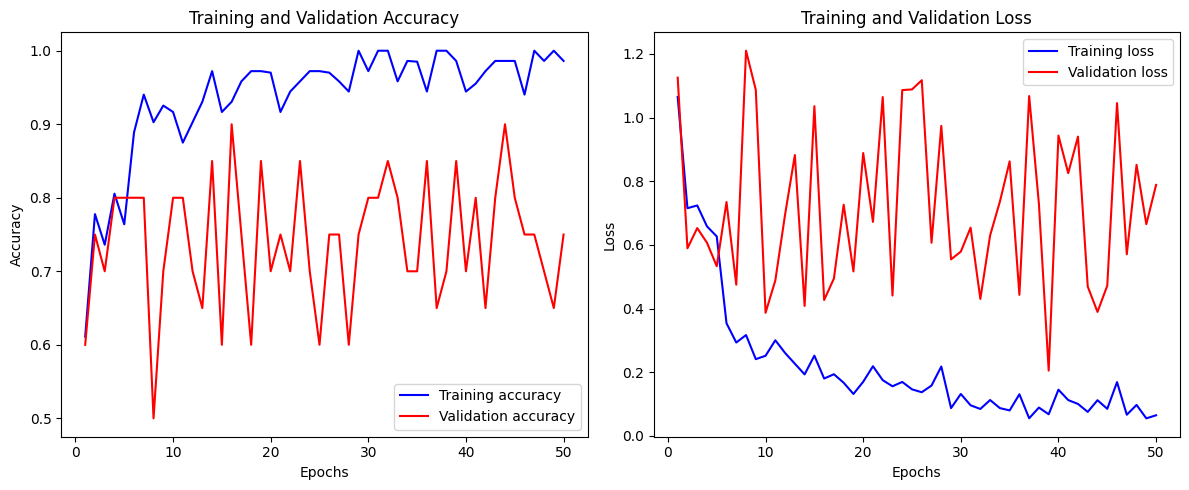

In [ ]:
plot_accuracy(history)

Found 217 images belonging to 10 classes.
Found 177 images belonging to 10 classes.
Number of classes in training data: 10
Class mapping: {'n01440764': 0, 'n01443537': 1, 'n01484850': 2, 'n01491361': 3, 'n01494475': 4, 'n01496331': 5, 'n01498041': 6, 'n01514668': 7, 'n01514859': 8, 'n01518878': 9}
Number of training samples: 217
Number of validation samples: 177


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 984ms/step - accuracy: 0.1669 - loss: 2.6959 - val_accuracy: 0.1500 - val_loss: 3.0900 - learning_rate: 0.0010
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 498ms/step - accuracy: 0.4984 - loss: 1.4951 - val_accuracy: 0.3500 - val_loss: 1.7003 - learning_rate: 0.0010
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 562ms/step - accuracy: 0.7252 - loss: 0.9186 - val_accuracy: 0.7500 - val_loss: 0.8635 - learning_rate: 0.0010
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.8333 - loss: 0.4072 - val_accuracy: 0.5500 - val_loss: 1.4670 - learning_rate: 0.0010
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 519ms/step - accuracy: 0.9122 - loss: 0.3744 - val_accuracy: 0.5000 - val_loss: 1.5474 - learning_rate: 0.0010
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 568ms/step - accuracy: 0.8125 - loss: 0.4571 - val_accuracy: 0.5000 - val_loss: 1.4863 - learning_rate: 0.0010
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 562ms/step - accuracy: 0.9206 - loss: 0.2620 - val_accuracy:

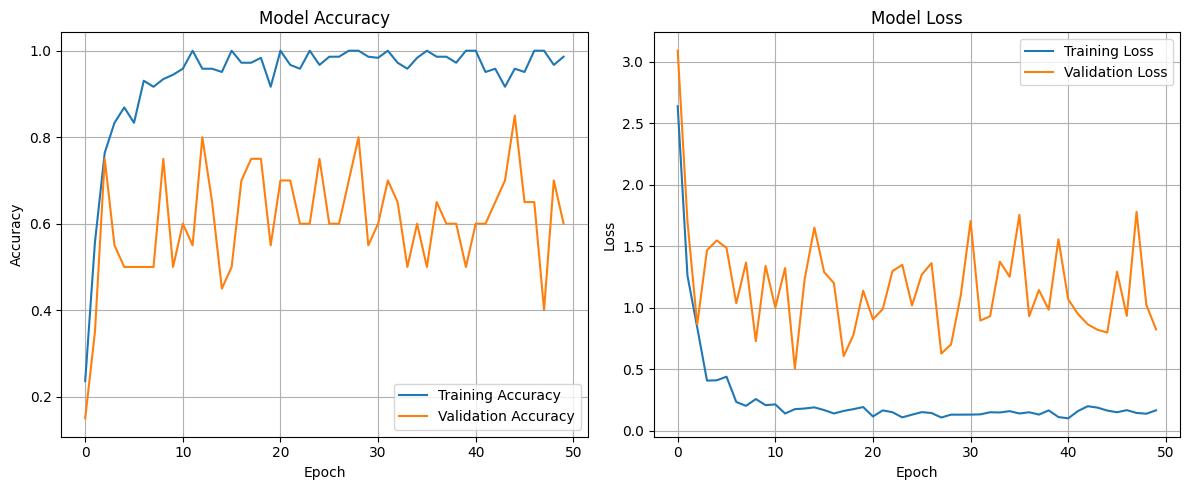

Final Training Accuracy: 0.9861
Final Validation Accuracy: 0.6000


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np

# Set up data generators
image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory(
        '/content/drive/MyDrive/thesis_data/pca_sorted',
        target_size=(image_size, image_size),
        batch_size=12,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        '/content/drive/MyDrive/thesis_data/val_10',
        target_size=(image_size, image_size),
        batch_size=20,
        class_mode='categorical')

# Print information about the data
print(f"Number of classes in training data: {len(train_generator.class_indices)}")
print(f"Class mapping: {train_generator.class_indices}")
print(f"Number of training samples: {train_generator.samples}")
print(f"Number of validation samples: {validation_generator.samples}")

# Get the number of classes from the data
num_classes = len(train_generator.class_indices)  # This should be 10 based on your error message

# Create the model with the correct number of classes
my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False,
                          pooling='avg',
                          weights='imagenet',  # Use standard weights
                          input_shape=(image_size, image_size, 3)))
my_new_model.add(Dense(num_classes, activation='softmax'))  # num_classes should be 10

# Make the ResNet50 part non-trainable
my_new_model.layers[0].trainable = False

# Compile the model
my_new_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Show model structure and output shape
my_new_model.summary()

# Create a learning rate scheduler
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Train the model
history = my_new_model.fit(
    train_generator,
    steps_per_epoch=6,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=1,
    callbacks=[reduce_lr]
)

# Optional: Save the model
# my_new_model.save('resnet50_10_classes.h5')

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print final accuracy values
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")

# Plot learning rate if it changed during training
if 'lr' in history.history:
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['lr'])
    plt.title('Learning Rate')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.yscale('log')
    plt.grid(True)
    plt.show()

#Working ResNet50

Using device: cuda
Training dataset class indices:
Class: n01440764, Index: 0
Class: n01443537, Index: 1
Class: n01484850, Index: 2
Class: n01491361, Index: 3
Class: n01494475, Index: 4
Class: n01496331, Index: 5
Class: n01498041, Index: 6
Class: n01514668, Index: 7
Class: n01514859, Index: 8
Class: n01518878, Index: 9

Checking class consistency between training and validation datasets...
Training classes: ['n01440764', 'n01443537', 'n01484850', 'n01491361', 'n01494475', 'n01496331', 'n01498041', 'n01514668', 'n01514859', 'n01518878']
Validation classes: ['n01440764', 'n01443537', 'n01484850', 'n01491361', 'n01494475', 'n01496331', 'n01498041', 'n01514668', 'n01514859', 'n01518878']

Validation dataset using training class indices:
Class: n01440764, Index: 0
Class: n01443537, Index: 1
Class: n01484850, Index: 2
Class: n01491361, Index: 3
Class: n01494475, Index: 4
Class: n01496331, Index: 5
Class: n01498041, Index: 6
Class: n01514668, Index: 7
Class: n01514859, Index: 8
Class: n015188

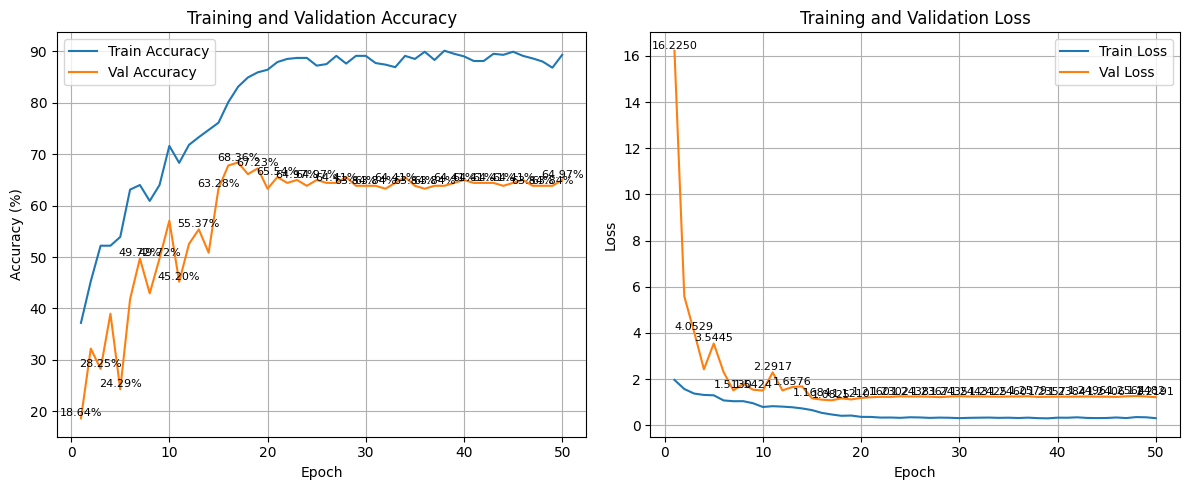


Epoch-by-epoch metrics:
----------------------------------------------------------------------
Epoch  | Train Loss | Train Acc  |  Val Loss  |  Val Acc  
----------------------------------------------------------------------
  1    |   1.9668   |   37.20   % |  16.2250   |   18.64   %
  2    |   1.5720   |   45.30   % |   5.5838   |   32.20   %
  3    |   1.3752   |   52.20   % |   4.0529   |   28.25   %
  4    |   1.3148   |   52.20   % |   2.4247   |   38.98   %
  5    |   1.2997   |   53.90   % |   3.5445   |   24.29   %
  6    |   1.0781   |   63.10   % |   2.3078   |   41.81   %
  7    |   1.0430   |   64.00   % |   1.5130   |   49.72   %
  8    |   1.0453   |   60.90   % |   1.7978   |   42.94   %
  9    |   0.9559   |   64.00   % |   1.5424   |   49.72   %
  10   |   0.7937   |   71.60   % |   1.5037   |   57.06   %
  11   |   0.8280   |   68.30   % |   2.2917   |   45.20   %
  12   |   0.8093   |   71.80   % |   1.5110   |   52.54   %
  13   |   0.7808   |   73.30   % |   1.65

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import copy
import numpy as np
import os

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set hyperparameters
num_epochs = 50
batch_size = 64
learning_rate = 0.001

# Initialize transformations for data augmentation
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(degrees=45),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Simpler transform for validation data (no augmentation)
val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Define paths
train_path = '/content/drive/MyDrive/thesis_data/selected_images/divided_pca_alpha/100_images'
val_path = '/content/drive/MyDrive/thesis_data/val'

# First, load the training dataset to get the class mapping
train_dataset = torchvision.datasets.ImageFolder(
    root=train_path,
    transform=train_transform
)

# Print class indices from training dataset
print("Training dataset class indices:")
train_class_indices = train_dataset.class_to_idx
for class_name, idx in train_class_indices.items():
    print(f"Class: {class_name}, Index: {idx}")

# Check if validation dataset classes match training dataset classes
print("\nChecking class consistency between training and validation datasets...")
train_classes = sorted(os.listdir(train_path))
val_classes = sorted(os.listdir(val_path))

print(f"Training classes: {train_classes}")
print(f"Validation classes: {val_classes}")

# Check if there are any classes in validation not in training
missing_classes = [cls for cls in val_classes if cls not in train_classes]
if missing_classes:
    print(f"Warning: These classes are in validation but not in training: {missing_classes}")

# Load validation dataset with the same class mapping as training
# This is crucial to ensure class indices match
class CustomImageFolder(torchvision.datasets.ImageFolder):
    def __init__(self, root, transform=None, target_transform=None, class_to_idx=None):
        super(CustomImageFolder, self).__init__(root, transform, target_transform)
        if class_to_idx:
            self.class_to_idx = class_to_idx
            # Now we need to update the targets based on the new class_to_idx
            self.targets = [class_to_idx.get(self.classes[target], -1) for target in self.targets]
            # Filter out any samples with target -1 (classes not in the mapping)
            valid_indices = [i for i, target in enumerate(self.targets) if target != -1]
            self.samples = [self.samples[i] for i in valid_indices]
            self.targets = [self.targets[i] for i in valid_indices]
            self.imgs = self.samples

val_dataset = CustomImageFolder(
    root=val_path,
    transform=val_transform,
    class_to_idx=train_class_indices  # Use training dataset's class mapping
)

# Verify that validation dataset has correct class indices
print("\nValidation dataset using training class indices:")
for class_name, idx in val_dataset.class_to_idx.items():
    print(f"Class: {class_name}, Index: {idx}")

# Create data loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=2
)

val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, num_workers=2
)

# Get the number of classes
num_classes = len(train_dataset.classes)
print(f"\nNumber of classes: {num_classes}")

# Load the ResNet50 model
model = torchvision.models.resnet50(pretrained=True)

# Modify the final fully connected layer to match the number of classes
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, num_classes)

# Parallelize training across multiple GPUs if available
if torch.cuda.device_count() > 1:
    print(f"Using {torch.cuda.device_count()} GPUs!")
    model = torch.nn.DataParallel(model)

# Set the model to run on the device
model = model.to(device)

# Define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Add learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.1, patience=3, verbose=True
)

# Lists to store metrics for plotting
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Function to train for one epoch
def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    running_corrects = 0
    total = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Calculate statistics
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        running_corrects += (predicted == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = running_corrects / total * 100

    return epoch_loss, epoch_acc

def validate_epoch(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Calculate statistics
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            running_corrects += (predicted == labels).sum().item()
            total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = running_corrects / total * 100

    return epoch_loss, epoch_acc

# Train the model
print("\nStarting training...")
start_time = time.time()
best_model_wts = copy.deepcopy(model.state_dict())
best_acc = 0.0

for epoch in range(num_epochs):
    epoch_start = time.time()

    # Train phase
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation phase
    val_loss, val_acc = validate_epoch(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Update scheduler
    scheduler.step(val_loss)

    # Save best model
    if val_acc > best_acc:
        best_acc = val_acc
        best_model_wts = copy.deepcopy(model.state_dict())

    epoch_time = time.time() - epoch_start

    # Print metrics
    print(f'Epoch {epoch+1}/{num_epochs}, Time: {epoch_time:.2f}s')
    print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
    print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
    print('-' * 60)

# Load best model weights
model.load_state_dict(best_model_wts)

# Save the model
torch.save(model.state_dict(), 'resnet50_best_model.pth')

total_time = time.time() - start_time
print(f'Training complete in {total_time // 60:.0f}m {total_time % 60:.0f}s')
print(f'Best val Acc: {best_acc:.2f}%')

# Plot training and validation metrics
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

# Add validation accuracy values as text
for i, v in enumerate(val_accuracies):
    if i % 2 == 0 or i == len(val_accuracies) - 1:  # Add text every other epoch and the last epoch
        plt.text(i+1, v, f"{v:.2f}%", fontsize=8,
                 verticalalignment='bottom', horizontalalignment='center')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Add validation loss values as text
for i, v in enumerate(val_losses):
    if i % 2 == 0 or i == len(val_losses) - 1:  # Add text every other epoch and the last epoch
        plt.text(i+1, v, f"{v:.4f}", fontsize=8,
                 verticalalignment='bottom', horizontalalignment='center')

plt.tight_layout()
plt.savefig('resnet50_training_metrics.png', dpi=300)
plt.show()

# Print a table with all metrics
print("\nEpoch-by-epoch metrics:")
print("-" * 70)
print(f"{'Epoch':^6} | {'Train Loss':^10} | {'Train Acc':^10} | {'Val Loss':^10} | {'Val Acc':^10}")
print("-" * 70)

for i in range(num_epochs):
    print(f"{i+1:^6} | {train_losses[i]:^10.4f} | {train_accuracies[i]:^10.2f}% | {val_losses[i]:^10.4f} | {val_accuracies[i]:^10.2f}%")

#Debug

In [ ]:
from torch.hub import load_state_dict_from_url

In [ ]:
# lst = ["n01440764", "n03394916", "n02102040", "n02979186",
#        "n03417042", "n03425413", "n03000684", "n03445777",
#        "n03028079", "n03888257"]
# lst = ["n01440764", "n01443537", "n01484850", "n01491361", "n01494475", "n01496331", "n01498041", "n01514668", "n01514859", "n01518878"]
lst = ["n01496331"]
for item in lst:
    !mkdir "/content/drive/MyDrive/thesis_data/neural_pca/train/{item}"
# lst = ["n01440764"]
for item in lst:
  !tar -xvf "/content/drive/MyDrive/thesis_data/neural_pca/train/{item}.tar" -C "/content/drive/MyDrive/thesis_data/neural_pca/train/{item}/"

n01496331_1147.JPEG
n01496331_8641.JPEG
n01496331_7517.JPEG
n01496331_11655.JPEG
n01496331_11015.JPEG
n01496331_13372.JPEG
n01496331_1010.JPEG
n01496331_11391.JPEG
n01496331_3375.JPEG
n01496331_11989.JPEG
n01496331_2017.JPEG
n01496331_77.JPEG
n01496331_13654.JPEG
n01496331_11758.JPEG
n01496331_9414.JPEG
n01496331_4505.JPEG
n01496331_10606.JPEG
n01496331_13934.JPEG
n01496331_2455.JPEG
n01496331_9284.JPEG
n01496331_7050.JPEG
n01496331_5102.JPEG
n01496331_8717.JPEG
n01496331_10734.JPEG
n01496331_4320.JPEG
n01496331_8695.JPEG
n01496331_11721.JPEG
n01496331_29594.JPEG
n01496331_9391.JPEG
n01496331_11594.JPEG
n01496331_318.JPEG
n01496331_2367.JPEG
n01496331_7934.JPEG
n01496331_5280.JPEG
n01496331_14584.JPEG
n01496331_10373.JPEG
n01496331_7735.JPEG
n01496331_23066.JPEG
n01496331_17187.JPEG
n01496331_12312.JPEG
n01496331_3635.JPEG
n01496331_12414.JPEG
n01496331_12737.JPEG
n01496331_14045.JPEG
n01496331_937.JPEG
n01496331_6430.JPEG
n01496331_29716.JPEG
n01496331_13516.JPEG
n01496331_29308.JPEG
